# SCHOOL CHARACTERISTICS AND AVERAGE SAT SCORES: DOES AVERAGE SOCIOECONOMIC STATUS AFFECT STUDENT PERFORMANCE?

# Introduction

The main idea of this project is to investigate whether the characteristics of schools affect their students’ average SAT scores and, if yes, which factors play the most important role. The main school characteristic I want to investigate is the average socioeconomic status (ASES). The ASES can be seen as a kind of peer effect because the SES of students tends to be correlated with their family backgrounds, personal abilities, and other factors that impact their and thus the classmates’ study habits and test outcomes. 

The project will use the data of NYC public schools in the 2014-2015 school year downloaded from Kaggle. The high school data was compiled and published by the New York City Department of Education, and the SAT score averages and testing rates were provided by the College Board. The information of schools contained in the dataset is name, location, enrollment, ethnicity distribution, and average SAT scores. 

The dependent variable, Y, for the project is the average SAT scores of schools. This variable is constructed by adding the average scores of three parts (Math, Reading, and Writing) of SAT for each school. I found that the correlation between the Average (Total) Score and every single part of the SAT are close to 1, which is very strong. Therefore, I believe that the factors influencing the Average (Total) SAT Score found in the project should affect the performance of students on each of the three parts in a similar way. Since the dataset only has the school-level average SAT score, not individual-level, I use it as a proxy of the performance of students in that school. Because the lower school-level SAT average is likely to be caused by lower quality teaching, poorer infrastructure, less funding, and so on. These factors all tend to negatively correlate with the SAT score of each student in the school. In the project, I will use 'school's average SAT score' and 'student performance' interchangeably. The independent variables, X’s, are school characteristics. Particularly, for ASES, I use the percentage of Black, Hispanic, White, and Asian students in the dataset as its proxy. Because “Hispanic and African-American students from comparable socioeconomic families scored lower than their Asian-American and White peers” (Dixon-Román et al., 2013, p. 7). Thus, schools with a higher percentage of Black and Hispanic students are considered to have a lower ASES, and vice versa.
In this study, I found that ASES is a significant influencer that positively correlated with students' performance in SAT. Other factors like the location, percentage of White and Asian students, the number of students enrolled, and the percentage of students took SAT tests all significantly affect students' SAT outcomes.


Angrist & Pischke (2015) had investigated and found using Fuzzy RD that there is no evidence of peer effects on student achievements. A similar study conducted by Abdulkadiroglu et al. (2014) of school quality on the level of student achievements also concluded that their results “fail to uncover systematic evidence of racial composition effects” (p. 178). My project will not only examine their findings, with an emphasis on the effect of ASES, using a different set of data and different sets of techniques but also find out if there is anything else that affects student performances.

# Project One

### Introduction
The entire project aims to find and analyze the linear relationship between SAT scores (Y) and school characteristics of NYC public schools, particularly the share of minorities(X) and locations. In the end, we will understand what and how school characteristics influenced students' SAT scores (Y) in NYC public schools in the 2014-2015 school year. The dataset is downloaded from https://www.kaggle.com/nycopendata/high-schools, where the high school data was compiled and published by the New York City Department of Education, and the SAT score averages and testing rates were provided by the College Board.

Particularly in Project One, I will conduct exploratory analysis on average SAT scores and the percentage of White, Black, Hispanic, and Asian students in NYC public schools in the 2014-2015 school year by investigating their distributions and calculating, comparing, and plotting data statistics. Then, I will evaluate the sufficiency of the evidence drawn from the data and comment on what evidence can be used to solve the problem.

#### 1. Load and Clean the Data

In [143]:
import pandas as pd 
import numpy as np 
import qeds
qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import graphviz
import plotly.graph_objects as go
%matplotlib inline 

from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from sklearn import tree

In [144]:
#load the data
df = pd.DataFrame(pd.read_csv("C:/Users/Owner/Desktop/ECO225/wk3/GitExercise/project 1/scores.csv"))
#take a look at what variables are included in the DataFrame
df.columns
#I want to investigate the average total scores, so we create a new column and add three scores together
df['Average SAT Score'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Reading)'] + \
df['Average Score (SAT Writing)']

I want to use the Average (Total) SAT Score as a proxy for the Average SAT Score on Math, Reading, and Writing. To check for eligibility, I take a look into the correlation between these 4 scores.

In [145]:
df.dropna().corr()['Average SAT Score'][4:7]

Average Score (SAT Math)       0.973165
Average Score (SAT Reading)    0.986493
Average Score (SAT Writing)    0.988878
Name: Average SAT Score, dtype: float64

See that the correlation between Average (Total) Score and each single part of SAT is very strong (close to 1), therefore, the factors influencing the Average (Total) SAT Score should affect the performance of students on each of the three parts in a similar way.

In [146]:
#remove all rows with NaNs, rest the index, and drop the unwanted columns
satdf = df.drop(['School ID', 'Building Code', 'Street Address', 'State', 'Phone Number', 'Average Score (SAT Math)',\
                'Average Score (SAT Reading)', 'Average Score (SAT Writing)'], axis = 1)
satdf = satdf.dropna().reset_index().drop(["index"], axis = 1)
#add one column of the number of hours students stay at schools
d = satdf[['Start Time', 'End Time']]
satdf['TDiff'] = (pd.to_datetime(d['End Time']) - pd.to_datetime(d['Start Time'])).astype('timedelta64[m]')/60
#change the data type
satdf = satdf.astype({'Zip Code': 'str'})
#convert entries with "%" to float type data
satdf.columns
for i in range(9, 14):
    satdf[satdf.columns[i]] = satdf[satdf.columns[i]].str.replace("%", "")
    satdf[satdf.columns[i]] = pd.to_numeric(satdf[satdf.columns[i]])
satdf.head(3)

,School Name,Borough,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,Average SAT Score,TDiff
0,"New Explorations into Science, Technology and ...",Manhattan,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,28.6,13.3,18.0,38.5,91.0,1859.0,7.75
1,Essex Street Academy,Manhattan,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,11.7,38.5,41.3,5.9,78.9,1193.0,6.75
2,Lower Manhattan Arts Academy,Manhattan,Manhattan,10002,40.71687,-73.98953,8:30 AM,3:00 PM,383.0,3.1,28.2,56.9,8.6,65.1,1261.0,6.50


#### 2. Summary Statistics of Independent and Dependent Variables
The independent variables(Y) is`Average SAT Score` and the dependent variables (X's) are `Percent White`, `Percent Black`, `Percent Hispanic`, and `Percent Asian`.

In [147]:
d0 = satdf[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']]
satdf2 = pd.concat([satdf['Average SAT Score'], d0], axis = 1)
d1 = pd.concat([satdf2.describe(), satdf2.mode()], axis = 0)
d1.rename(index = {0: 'mode'}).round(decimals = 2)

,Average SAT Score,Percent White,Percent Black,Percent Hispanic,Percent Asian
count,374.00,374.00,374.00,374.00,374.00
mean,1275.35,8.52,35.39,43.93,10.41
std,194.87,13.36,25.37,24.50,14.40
min,924.00,0.00,0.00,2.60,0.00
25%,1157.00,1.30,16.40,20.82,1.60
50%,1226.00,2.60,28.75,45.30,4.20
75%,1327.00,9.38,50.10,63.38,11.15
max,2144.00,79.90,91.20,100.00,88.90
mode,1161.00,1.20,0.00,56.90,0.00


From the summary table above, the mean of the ``Average SAT Score`` is greater than its median, this implies that
the distribution of the ``Average SAT Score`` is right-skewed. By applying the comparison to the dependent variables,
notice that except for `Percent Hispanic` whose distribution is left-skewed, those of `Percent White`,
`Percent Black` and `Percent Asian` are all right-skewed. The minimum `Average SAT Score` of public
schools is 924 whereas the highest scores in 2144. The range is 1220, which is very large. This shows that there
is a large gap between the effectiveness of education and the quality of teaching of best schools and worst
schools. The interquartile range of `Average SAT Score` is 170 and its standard deviation is around 195,
showing that the distribution of `Average SAT Score` has a long tail on the right since the third quartile is within
mean±2σ, but the maximum is outside the interval of mean±4σ.

I noticed that the percentage of White, Black, and Asian students in some NYC public schools is 0% and it
happens more often for Black and Asian students since the modes for `Percent Black` and `Percent Asian`
are also 0. In contrast, the percentage of Hispanic students reached 100% in some schools. By looking at the
mean and median (50%) of the dependent variables, I found that the values for `Percent White` and Percent
Asian are similar but much smaller than that of `Percent Black` and `Percent Hispanic`. This means that,
overall, NYC public schools have more Hispanic and Black students than White and Asian. Also, the standard
deviations for `Percent White` and `Percent Asian` are similar and smaller than those of `Percent Black`
and `Percent Hispanic`. This means that distributions of former ones are less spreaded or dispersed than those
of latter ones. Meanwhile, the ranges and IQRs of `Percent Black` and `Percent Hispanic` are greater than
those of `Percent White` and `Percent Asian`.

Besides, the size of the dataset is 374, which is small. So there may not be sufficient evidence for us to solve the
question accurately.

#### 3. Plot Independent Variable
The independent variable (Y) is the `Average SAT Score`. I plot a histogram to see the distribution of average SAT
scores of NYC Public Schools in 2014-2015 school year.

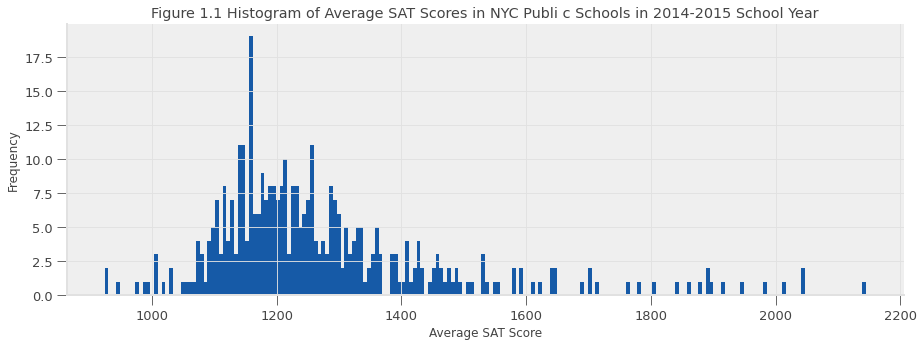

In [148]:
#get the number of rows/schools in the dataframe, used to determine number of bins
len(satdf)
d2 = satdf['Average SAT Score']
plt.rcParams["figure.figsize"] = (15, 5)
d2.plot.hist(bins = 200, title = 'Figure 1.1 Histogram of Average SAT Scores in NYC Publi c Schools in 2014-2015 School Year', \
             fontsize = 13) 
plt.xlabel('Average SAT Score') 
plt.show()

The distribution of the `Average SAT Score` is right-skewed, with the mode at 1161 (based on the graph and the summary statistics in section 2). The shape is reasonable since few students get very low or very high scores in
the test, and most students get scores somewhere in the middle. This finding from the histogram corresponds to
those in section 2 from the summary table.

#### 4. Plot Dependent Variables
The dependent variables(X) are `Percent White`, `Percent Black`, `Percent Hispanic`, `Percent Asian`.

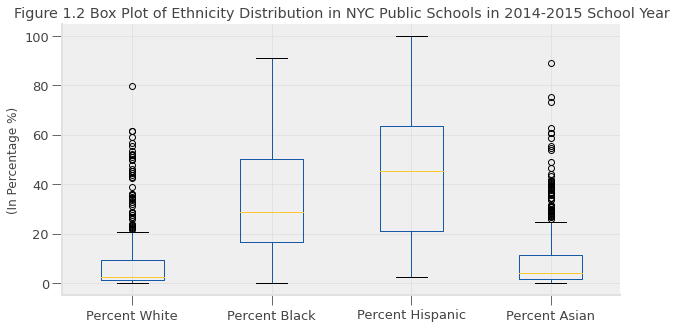

In [149]:
plt.rcParams["figure.figsize"] = (10, 5)
d0.boxplot(fontsize = 13)
plt.title('Figure 1.2 Box Plot of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year')
plt.ylabel('(In Percentage %)')
plt.show()

From the boxplot, the percentage of Hispanic students is the highest among NYC Public Schools in 2014-2015
School Year, followed by that of Black students, Asian, and White Students.

Notice that the distribution of `Percent White` and `Percent Asian` look similar. The values are mainly below
20% with a lot of outliers that are larger than the main 'body' of the data. So, they are both right-skewed. Their
range, first, second, third quartiles, and thus IQR are about the same value.

The range of `Percent Black` and `Percent Hispanic` are similar, but their distributions are different.
`Percent Black` 's distribution is slightly right-skewed whereas `Percent Hispanic` 's is left-skewed. There is
no outlier in their data. Overall, the percentage of Hispanic students is around 5% higher than the percentage of
Black students.

These findings correspond to what we got in section 2 from the summary table.

#### 5. Plot The Correlation
In this section, I will calculate and plot the correlation between average SAT scores (Y) and the percentage of White, Black, Hispanic, and Asian students (X's).

In [150]:
#the method calculates the correlation between all columns in the data frame
#for simplicity, we only take a look at the first column of the resulted data frame
satdf2.corr()['Average SAT Score'][1:len(satdf2)]

Percent White       0.622380
Percent Black      -0.302675
Percent Hispanic   -0.410191
Percent Asian       0.608893
Name: Average SAT Score, dtype: float64

The results above are the correlation between average SAT scores and the percentage of White, Black, Hispanic, and Asian students respectively. To get a better understanding, I made scatterplots for average SAT scores against each `Percent`.

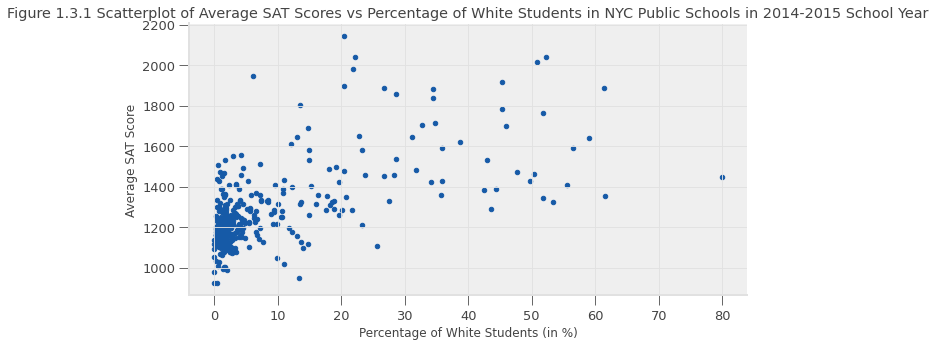

In [151]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent White', y = 'Average SAT Score', fontsize = 13)
plt.title('Figure 1.3.1 Scatterplot of Average SAT Scores vs Percentage of White Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of White Students (in %)')
plt.show()

Since no clear relationship can be seen, I want to conduct a log transformation on the y variable.

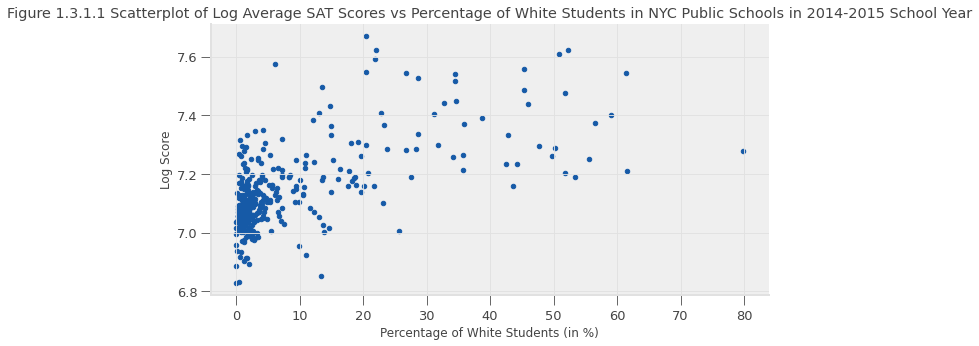

In [152]:
# take the log of average SAT score
satdf2["Log Score"] = np.log(satdf2["Average SAT Score"])

plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent White', y = 'Log Score', fontsize = 13)
plt.title('Figure 1.3.1.1 Scatterplot of Log Average SAT Scores vs Percentage of White Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of White Students (in %)')
plt.show()

Notice that there is no significant improvement in the visualization of the relationship using log transformation.

The correlation between `Average SAT Score` and `Percent White` is 0.622380, indicating a moderate
positive relationship between the average SAT score and the percentage of White students in NYC Public
Schools in 2014-2015 School Year. From the first scatterplot, it can be seen that overall, the average SAT score
increases with the increasing percentage of White students. This pattern is not clear since most of the data cluster
at the left bottom corner. Doing a log transformation may solve the problem, but the interpretation of the
transformed variable is less meaningful.

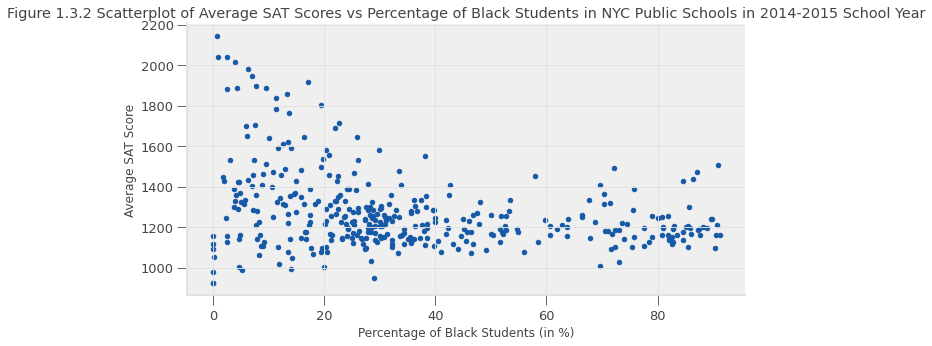

In [153]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Black', y = 'Average SAT Score', fontsize = 13)
plt.title('Figure 1.3.2 Scatterplot of Average SAT Scores vs Percentage of Black Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Black Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent Black` is -0.302675, indicating a weak negative
relationship between the average SAT score and the percentage of Black students in NYC Public Schools in
2014-2015 School Year. From the scatterplot, it can be seen that when `Percent Black` is less than 40%, the
average SAT score decreases in general with an increasing percentage of Black students whereas the `Average SAT Score` remained steady as `Percent Black` increase from 40% to above 80%.

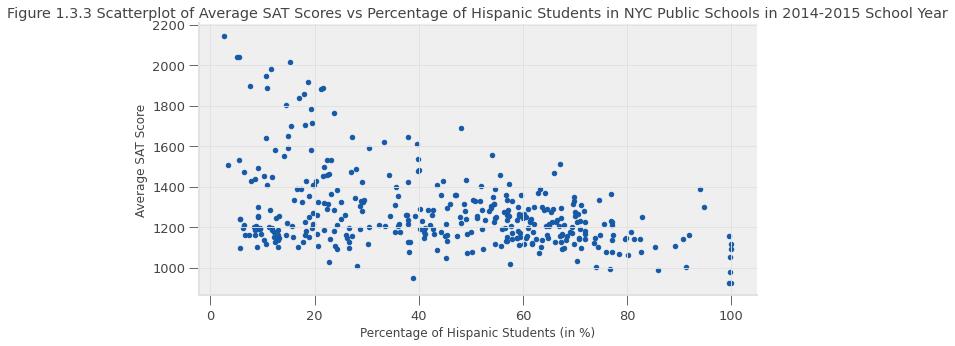

In [154]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Hispanic', y = 'Average SAT Score', fontsize = 13)
plt.title('Figure 1.3.3 Scatterplot of Average SAT Scores vs Percentage of Hispanic Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Hispanic Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent Black`. The correlation between `Average SAT Score` and
`Percent Hispanic` is -0.410191, indicating a weak negative relationship between the average SAT score and
the percentage of Hispanic students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it
can be seen that when `Percent Hispanic` is less than 40%, the average SAT score decreases in general with
an increasing percentage of Hispanic students whereas the pattern gets unclear as `Percent Black` increase
from 40% to 100%.

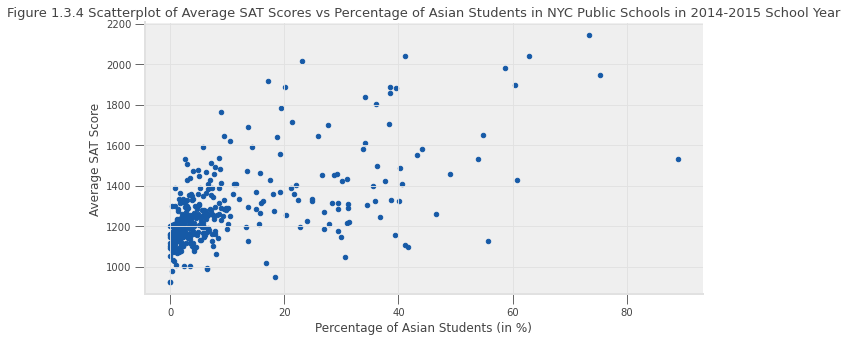

In [155]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Asian', y = 'Average SAT Score')
plt.title('Figure 1.3.4 Scatterplot of Average SAT Scores vs Percentage of Asian Students in NYC Public Schools \
in 2014-2015 School Year', fontsize = 13)
plt.xlabel('Percentage of Asian Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent White`. The correlation between `Average SAT Score` and `Percent Asian` is 0.608893, indicating a moderate positive relationship between the average SAT score and
the percentage of Asian students in NYC Public Schools in the 2014-2015 School Year. From the scatterplot, it can
be seen that overall, the average SAT score increases with an increasing percentage of Asian students.

#### 6. Deeper Investigation using GroupBy
In this section, I will use Groupby to explore more about the covariates and their correlations with the outcome.

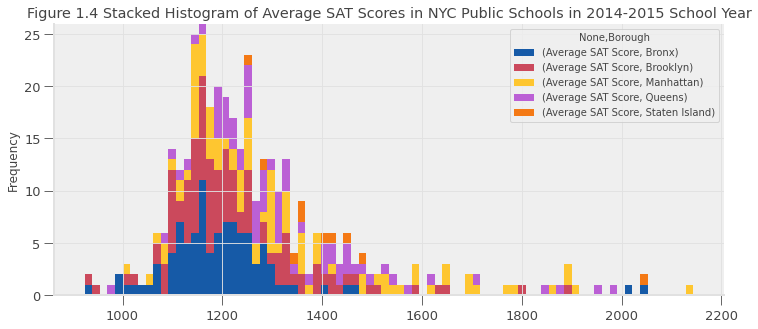

In [156]:
#investigate the number of groups by each variable
df["City"].unique() 
df["Borough"].unique()
satdf3 = pd.concat([satdf[["Borough", "City"]], satdf2], axis = 1)
sat_B = satdf3[["Average SAT Score", "Borough"]]
plt.rcParams["figure.figsize"] = (12, 5)
sat_B.pivot(columns = "Borough").plot(kind = 'hist', stacked = True, bins = 80, fontsize = 13)
plt.title("Figure 1.4 Stacked Histogram of Average SAT Scores in NYC Public Schools in 2014-2015 School Year")
plt.show()

From the stacked histogram above, it can be seen that the distributions of Average SAT Scores in NYC Public Schools in 2014-2015 School Year are similar across Boroughs. In general, Staten Island have the highest `Average SAT Score`, followed by Queens, Manhattan, Brooklyn, and the Bronx.


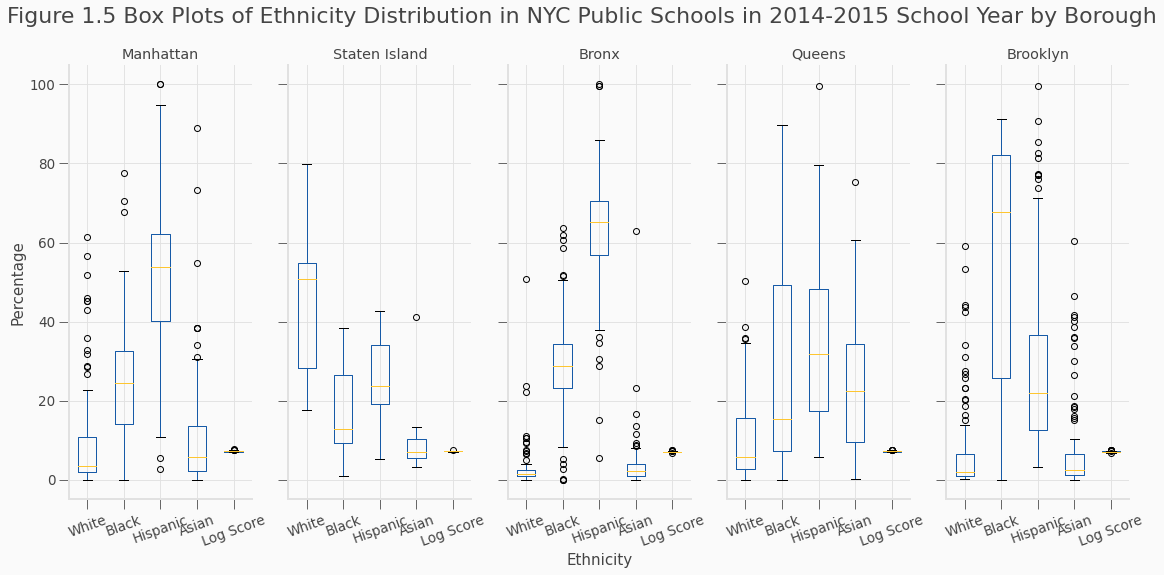

In [157]:
satdf4 = satdf3.rename(columns = {"Percent White": "White", "Percent Black": "Black", "Percent Hispanic": "Hispanic",\
                       "Percent Asian": "Asian"})

def single_box_plot(df, b, ax):
    """
    This function creates a single boxplot for distribution of ethnic groups across Boroughs
    """
    # Filter data to keep only the data of interest
    _df = satdf4.drop("Average SAT Score", axis = 1).loc[satdf4['Borough'] == b]
    # make a box plot
    _df.plot(kind = "box", ax = ax, fontsize = 13.5, rot = 20)
    return ax

fig, ax = plt.subplots(1, 5, figsize = (19, 8), sharey = True)

for (i, b) in enumerate(satdf4.Borough.unique()):
    # for loop, make a plot for all Boroughs
    single_box_plot(satdf4, b, ax[i])
    ax[i].set_title(str(b))
    
# change background color and add title and labels
bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
fig.suptitle("Figure 1.5 Box Plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year by Borough", \
             fontsize = 22)
ax[0].set_ylabel("Percentage", fontsize = 15)
ax[2].set_xlabel("Ethnicity", fontsize = 15)

for (i, _ax) in enumerate(ax):
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)
    
    _ax.set_facecolor(bgcolor) 

The above are box plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year across
boroughs. Notice that the distribution varies significantly between boroughs.

The distribution of ethnicity in Bronx and Manhattan are similar: `Percent White` , `Percent Asian` , and
`Percent Black` is right-skewed, `Percent Hispanic` is slightly left-skewed. The percentage of White and
Asian students are the least and have similar values, followed by the percentage of Black and Hispanic. These 2
boroughs have similar patterns of ethnicity distribution as the entire NYC in section 4. 

For Brooklyn, the distribution of `Percent White` and `Percent Asian` are similar: right-skewed, similar
quartiles and range. But here, `Percent Hispanic` is also right-skewed, with smaller values than Percent
Black in general. Here, `Percent Black` is slightly left-skewed and with the largest range and quartile values
among all ethnicity groups.

Then, in Queens, the four variables' distributions all have a right skewness. Overall, `Percent White` has the
smallest value. followed by `Percent Asian` , `Percent Black` , and `Percent Hispanic` .

In Staten Island, it is obvious that `Percent White` has the highest value among all ethnicity groups, with slight
left skewness. This situation only exists in the borough Staten Island. The distributions of the variables of the other 3
ethnicity groups are right-skewed with `Percent Hispanic` having larger values, followed by `Percent Black`
and `Percent Asian` .

The ASES of schools in these Bronx, Manhattan, and Brooklyn tend to be the lower on average, followed by Queens and Staten Island.
Since the pattern in Staten Island is so distinct from others, I take a look at the average scores and evaluate the
findings based on the number of schools investigated in each borough.

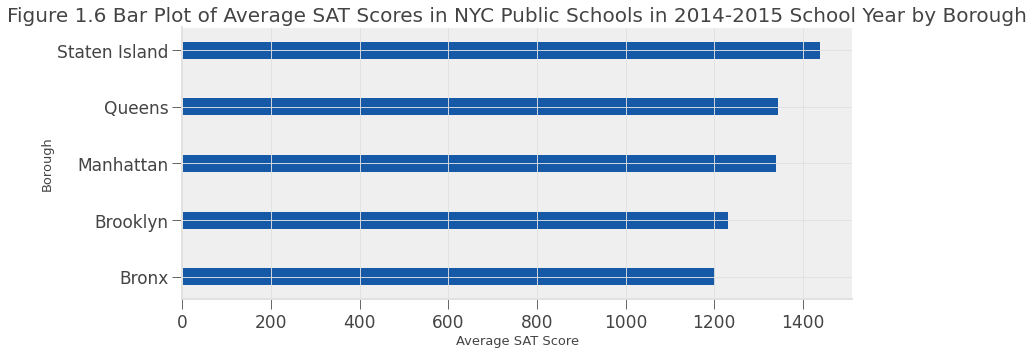

In [158]:
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots()
gbb = satdf4[["Borough", "Average SAT Score"]].groupby("Borough").mean().sort_values('Average SAT Score', ascending = True)
gbb.plot(kind = "barh", ax = ax, legend = False, fontsize = 17, width = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Figure 1.6 Bar Plot of Average SAT Scores in NYC Public Schools in 2014-2015 School Year by Borough",\
             fontsize = 20)
ax.set_xlabel("Average SAT Score", fontsize = 13)
ax.set_ylabel("Borough", fontsize = 13)
plt.show()

In [159]:
sat_B.groupby("Borough").count().rename(columns = {'Average SAT Score':'Number of Schools'})
# satdf3.groupby("Borough")['City'].value_counts().to_frame(name = "Number of Schools")

,Number of Schools
Borough,
Bronx,98
Brooklyn,109
Manhattan,89
Queens,68
Staten Island,10


See from the bar plot that schools in Staten Island have the highest Average SAT scores compared to other
boroughs. But since the number of schools in Staten Island investigated in the dataset is 10, which is too small,
there is insufficient evidence to conclude that a greater percentage of White students will have a positive impact on
the SAT scores.

Besides, among the other 4 boroughs, schools in Manhattan have the highest Average SAT scores, but from the
boxplot, `Percent Hispanic` is the highest among all ethnic groups. We cannot conclude a higher proportion of
Hispanic students at school also lead to a higher average SAT scores because, in Bronx, `Percent Hispanic` is
also the highest, and its average score is the lowest among all boroughs in NYC from the barplot.

So far, we cannot draw a clear relationship between ASES and average SAT scores for schools.

### Conclusion
The distribution of average SAT scores are similar across the boroughs in NYC such that the overall distribution
also has similar patterns as them: right-skewed. But the distribution of ethnicity varies from boroughs to
boroughs, and the overall pattern is largely influenced by the places that have a larger amount of data in the
dataset.

So far, by looking at the pattern generally and individually, there isn't sufficient evidence to find a relationship
between average SAT scores and ethnicity distribution. To better understand the relationship, we need to either
increase the size of the dataset by adding more statistics or include more covariates into consideration and run a
linear regression of X on Y.

# Project Two

## Introduction
In Project Two, I will conduct deeper exploratory analysis on the data to investigate the association between enthnicity distribution(X), locations, and average SAT scores (Y). I will use the Zipcode (ZCTA) shapefile https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip and the counties shapefile https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip for the maps.

Also, I will evaluate the sufficiency of the evidence drawn from the data and comment on what the evidence can be used to solve the problem.

### THE MESSAGE 
I want to investigate whether the average SAT score and the average ethnic proportion groups in schools differ across Boroughs/Cities and by how much. I will only keep the plots that convey information clearly.

### Plots for THE MESSAGE

In [160]:
# A bar plot comparing average SAT scores across Boroughs and Cities.
satdf5 = satdf4[["Borough", "City", "Average SAT Score"]].groupby(["Borough", "City"]).mean()
gbc = satdf5.sort_values('Average SAT Score', ascending = True).reset_index()
gbm_b = satdf4[["Borough", "White", "Black", "Hispanic", "Asian"]].groupby("Borough").mean()
gbm_c = satdf4[["City", "White", "Black", "Hispanic", "Asian"]].groupby("City").mean()

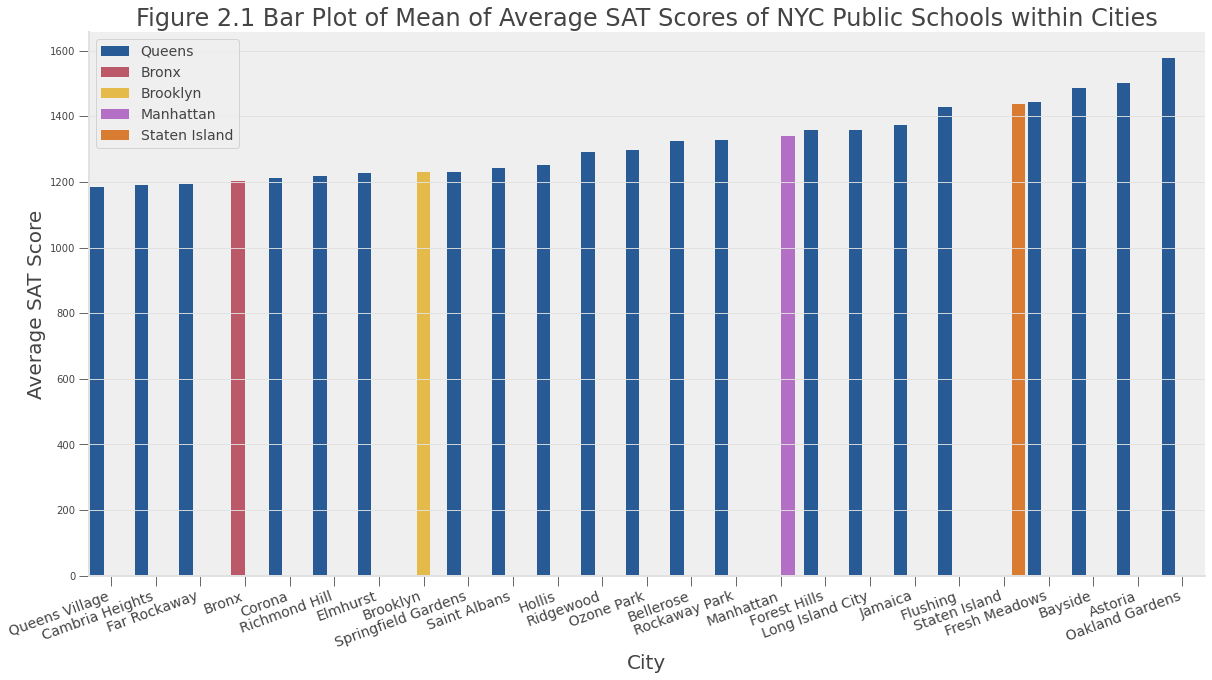

In [161]:
import seaborn as sns
fig,ax = plt.subplots()
fig.set_size_inches(20, 10)
p = sns.barplot(x = 'City', y ='Average SAT Score', data = gbc, hue = 'Borough', ax = ax)

#fine-tune
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

change_width(ax, 0.3)

plt.legend(prop = {'size': 14})
p.set_xticklabels(p.get_xticklabels(), rotation = 20, horizontalalignment = 'right', fontsize = 14)
ax.set_xlabel("City", fontsize = 20)
ax.set_ylabel("Average SAT Score", fontsize = 20)
ax.set_title('Figure 2.1 Bar Plot of Mean of Average SAT Scores of NYC Public Schools within Cities', fontsize = 24)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [162]:
sat_C = satdf3[["Average SAT Score", "City"]]
sat_C.groupby("City").count().rename(columns = {'Average SAT Score':'Number of Schools'})

,Number of Schools
City,
Astoria,5
Bayside,1
Bellerose,1
Bronx,98
Brooklyn,109
Cambria Heights,2
Corona,1
Elmhurst,4
Far Rockaway,3


As seen from the plot above, the distribution of average SAT scores of schools in cities of Queens Borough is fairly
even (i.e. the number of schools within a certain range of SAT scores is similar). But within the Borough, variations
of average SAT scores of schools is large across cities as the lowest is below 1200 while the highest is around 1600. 

From the table above, notice that the number of schools from most cities in the dataset is close to 1. This value is too small to conduct analysis and draw meaningful conclusions. So I will not consider the analysis city by city in the following.

For the other 4 boroughs, not much information can be drawn from the plot since they only have one city
included in the dataset. We can only see that the average SAT scores of schools in Staten Island Borough is the
highest among the four, followed by Manhattan, Brooklyn, and Bronx.

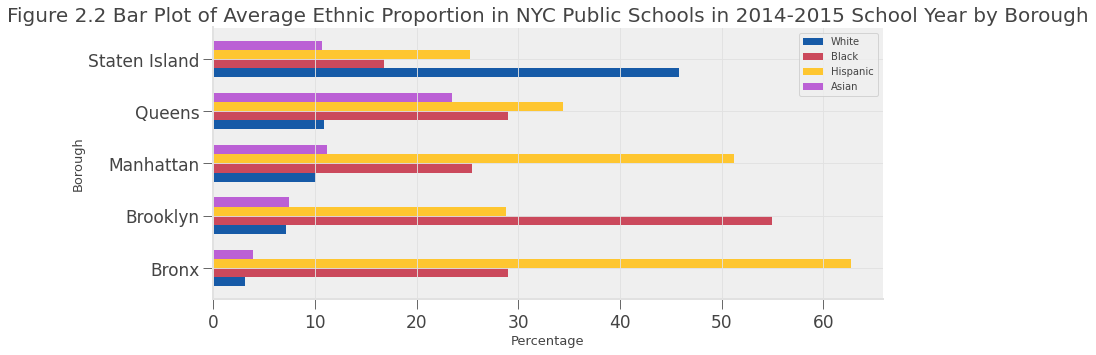

In [163]:
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots()
gbm_b.plot(kind = "barh", ax = ax, legend = True, fontsize = 17, width = 0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Figure 2.2 Bar Plot of Average Ethnic Proportion in NYC Public Schools in 2014-2015 School Year by \
Borough", fontsize = 20)
ax.set_xlabel("Percentage", fontsize = 13)
ax.set_ylabel("Borough", fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

From the bar plot above, it can be seen that within Borough Queens, Manhattan, Brooklyn, and Bronx, the
average percentage of Hispanic and Black students are the highest, followed by that of Asian and White. So we
can expect the average SAT scores of schools in these Boroughs are close if assume all other characteristics of
schools are the same.

The pattern changes in Borough Staten Island. The average percentage of White is the highest. We could expect
the difference in average SAT scores of schools in Staten Island and other 4 Boroughs, keeping all other
characteristics of schools the same.

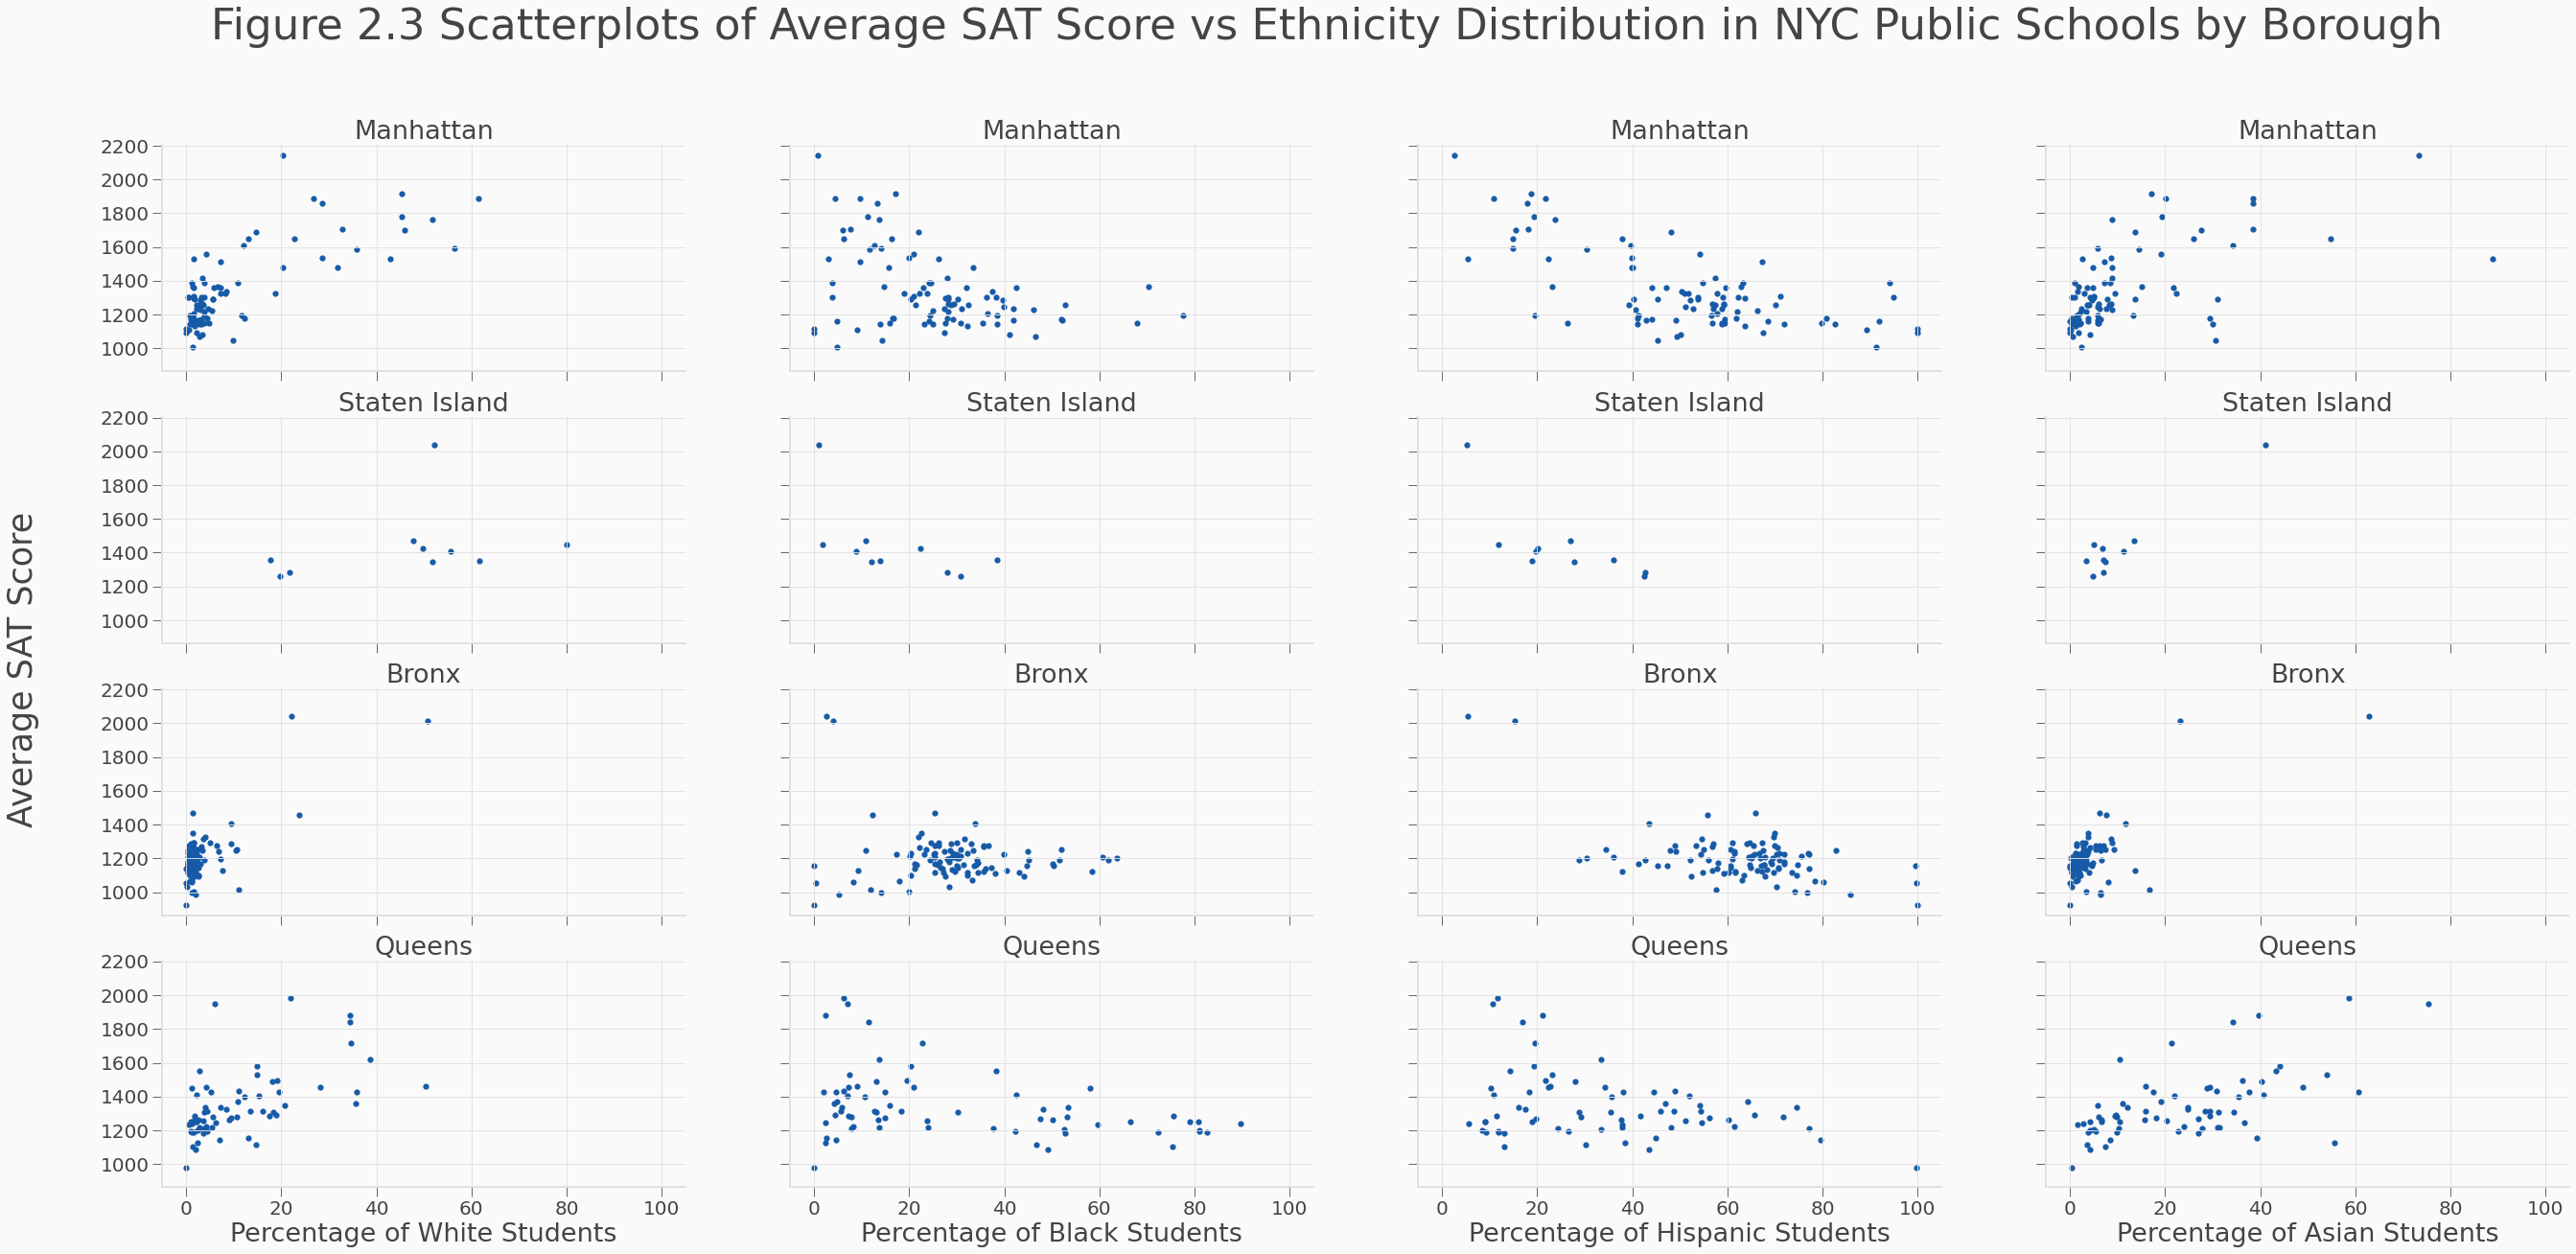

In [164]:
# scatterplots for scores by borough vs percentage of ethnicity (4 boroughs here)

def single_scatter_plot1(df, b, r, ax):
    """
    This function creates a single scatterplot of average SAT score against the distribution of ethnic groups 
    """
    # Filter data to keep only the data of interest
    _df = df.query("Borough == @b")[["Average SAT Score", r]]
    # make a scatterplot of Average SAT Score against the shares of each ethnic group
    _df.plot(kind = "scatter", x = r, y = "Average SAT Score", ax = ax, fontsize = 20, s = 27)

    return ax


fig, ax = plt.subplots(4, 4, figsize = (45, 20), sharey = True, sharex = True)
bgcolor = (250/255, 250/255, 250/255)
# want to create a 4x4 plot for all broughs and ethnicity

for i in range(4):
    for j in range(4):
        single_scatter_plot1(satdf4, satdf4.Borough.unique()[i], list(satdf4)[3:][j], ax[i, j])
        # Fine-tuning the subplot
        ax[i, j].set_ylabel("")
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_facecolor(bgcolor) 
        ax[i, j].set_title(str(satdf4.Borough.unique()[i]), fontsize = 27)
        # only need the x label for the last plot of each column (i = 3)
        if i == 3:
            ax[i, j].set_xlabel(("Percentage of " + str(list(satdf4)[3:][j]) + " Students"), fontsize = 27)
            
# set the title and y label
fig.text(0.075, 0.5, 'Average SAT Score', va = 'center', rotation = 'vertical', fontsize = 35)        
fig.set_facecolor(bgcolor)
fig.suptitle("Figure 2.3 Scatterplots of Average SAT Score vs Ethnicity Distribution in NYC Public Schools by Borough",\
             fontsize = 45)
plt.show()

The plots above are the scatterplots of the average SAT score of school in each borough against the ethnic shares in
NYC Public Schools. Scatterplots enable us to have a more direct and clear look at the correlation between
percentage of students with certain ethnicity and the school's average SAT score.

First, notice that there are fewer points in the scatterplot for Staten Island compared with other boroughs, implying there is a small number of samples for this borough in our dataset. We see a positive correlation between average SAT score and `Percent White` and `Asian` as well as a moderate negative correlation between average SAT score and `Percent Black` and `Hispanic`. This implies that, for public schools in Staten Island, lower ASES decreases the average SAT score of students. But due to the small size of data, we cannot draw the conclusion for the correlation with 100% confidence.

Second, for the remaining 3 boroughs, there are weak positive correlations between average SAT score and
`Percent White` as well as `Percent Asian`. Meanwhile, there are weak negative correlations between
average SAT score and `Percent Black` as well as `Percent Hispanic`.

Since the pattern is not strong enough to indicate a correlation between the ASES and student performance,
we need deeper investigations to find out the relationship between X and Y.

### Map for THE MESSAGE
We want to investigate whether the location is a confounder that impacts the relationship between ethnic shares and
average SAT scores. For all maps in this section, the grey part is the location where none of the schools is
included in the dataset.

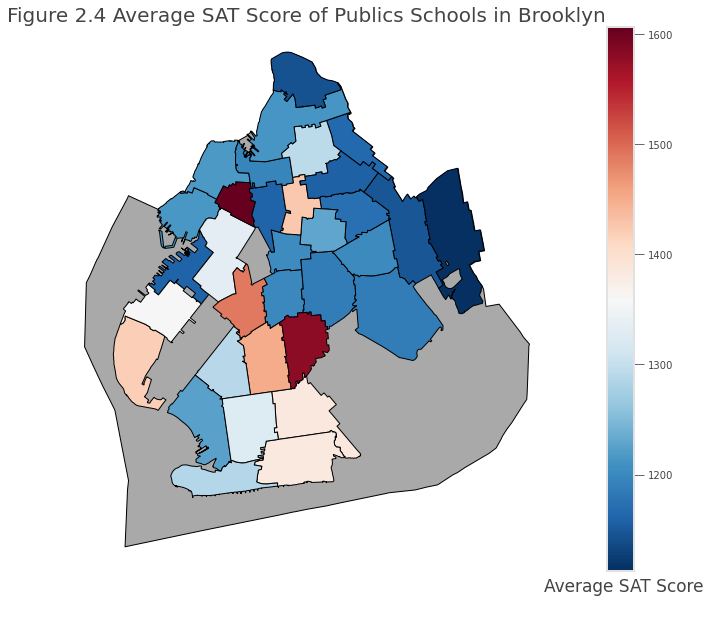

In [165]:
# Average SAT grades for each zip code in Kings County
import geopandas as gpd
from shapely.geometry import Point
#1. calculate average SAT scores for each zip code in Kings County 
zip_df = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip") 
zip_df.dtypes
satdf6 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Average SAT Score"]].groupby("Zip Code").mean().reset_index()
satdf6.dtypes

#2. merge with the zipfile, keep the df with less info, check for column info before merging
mdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf6, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
mdf.head()
type(mdf)

#3. plot the info on map
# 1) Plot the map of King County
county = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip") 
county_df = county.query("(STATEFP == '36') & (NAME == 'Kings')") 
county_df.head()
fig, gax = plt.subplots(figsize = (20, 10)) 

county_df.plot(ax = gax, edgecolor = "black", color = "darkgrey") 
# 2) Add relevant info
mdf.plot(ax = gax, edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
# 3) Annotate & Add labels
gax.annotate('Average SAT Score', xy = (0.75, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax.set_title('Figure 2.4 Average SAT Score of Publics Schools in Brooklyn', fontsize = 20)

# 3) Fine-tune
plt.axis('off')
plt.show()

It is obvious that, overall, the average SAT scores of northern regions in Kings County are lower than that in the south and the middle of the county. But 2 areas with zip codes 11216 and 11217 in the north are exceptions: their zip code-level score is much higher than the other places near them. And since around 2/3 part of the county is missing in the dataset, we do not have sufficient evidence to conclude that the southern and middle part of King county have higher SAT scores on average than the northern part.

In [166]:
# write a function for making the side-by-side map 
def map_plot1(df, b, r, label1, label2):
    """
    This function creates a side-by-side map of average SAT score and the distribution of ethnic group r in borough b
    The plots will be labelled separately.
    """
    # Filter data to keep only the data of interest
    _df = df.query("Borough == @b")[["Zip Code", r]].groupby("Zip Code").mean().reset_index()
    pdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], _df, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
    
    fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 
    # plot the map of average SAT score for borough b
    county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
    mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
    # add labels and title
    gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
    gax[0].set_title('Figure '+ label1 +' Average SAT Score \n of Publics Schools in '+ b, fontsize = 25)
    gax[0].axis('off')
    
    # plot the map of average percentage of r student in borough b
    race = r.split(" ")[1]
    county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
    pdf.plot(ax = gax[1], edgecolor = 'black', column = r, legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
    # add labels and title
    gax[1].annotate(\
    'Average Percentage of '+ race + ' Students', xy = (0.73, 0.06),  xycoords = 'figure fraction', fontsize = 17)
    gax[1].set_title(\
    'Figure '+ label2 + ' Average Percentage \n of '+ race +' Students in Publics Schools \n in '+ b, fontsize = 25)
    gax[1].axis('off')

    return ax


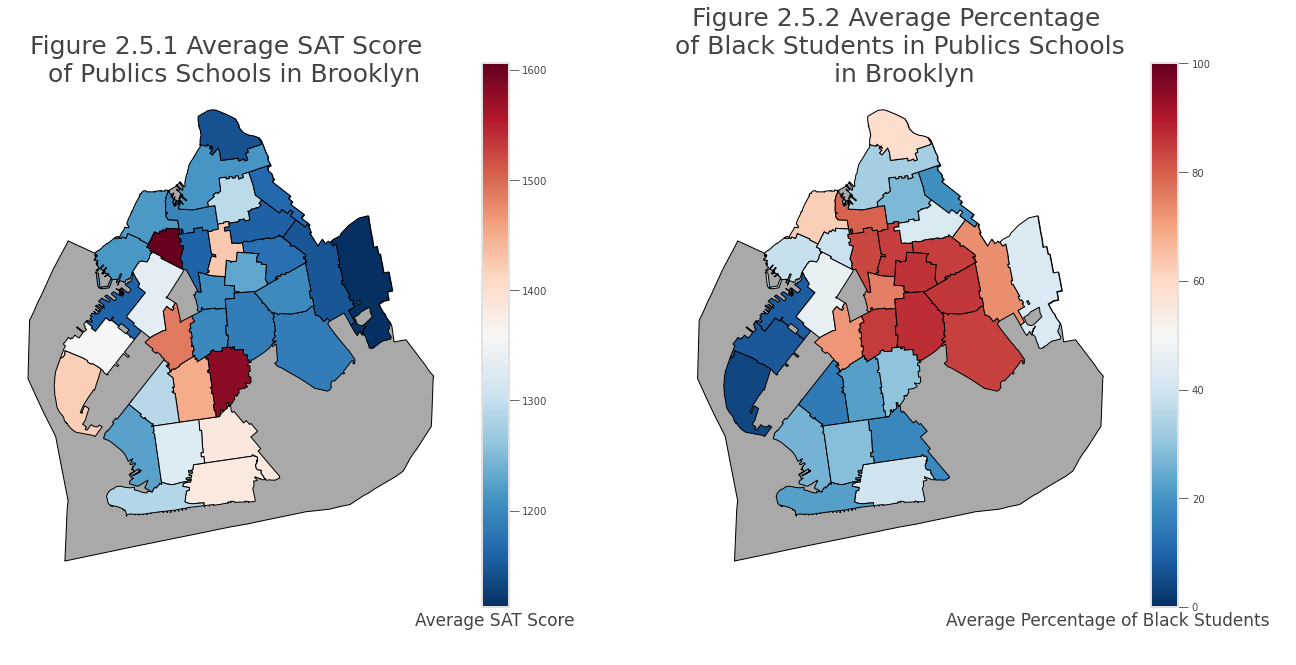

In [167]:
# Plot Average Percentage of Black students for each zip code in Kings County with Average SAT score side-by-side
map_plot1(satdf,'Brooklyn', 'Percent Black', '2.5.1', '2.5.2')
plt.show()

The plot above relates the average SAT score and the average percentage of Black students at schools in the Kings County. 

From the plot, public schools in the middle of the county have a higher proportion of Black students, which is around 80%. See that the corresponding regions have relatively lower average SAT scores. And as the contrast of colors in the remaining regions is significant, the majority of the rest part of the county where the average `Percent Black` is high have lower average SAT score. Thus, there may be large negative correlation between `Percent Black` and `Average SAT Score`.

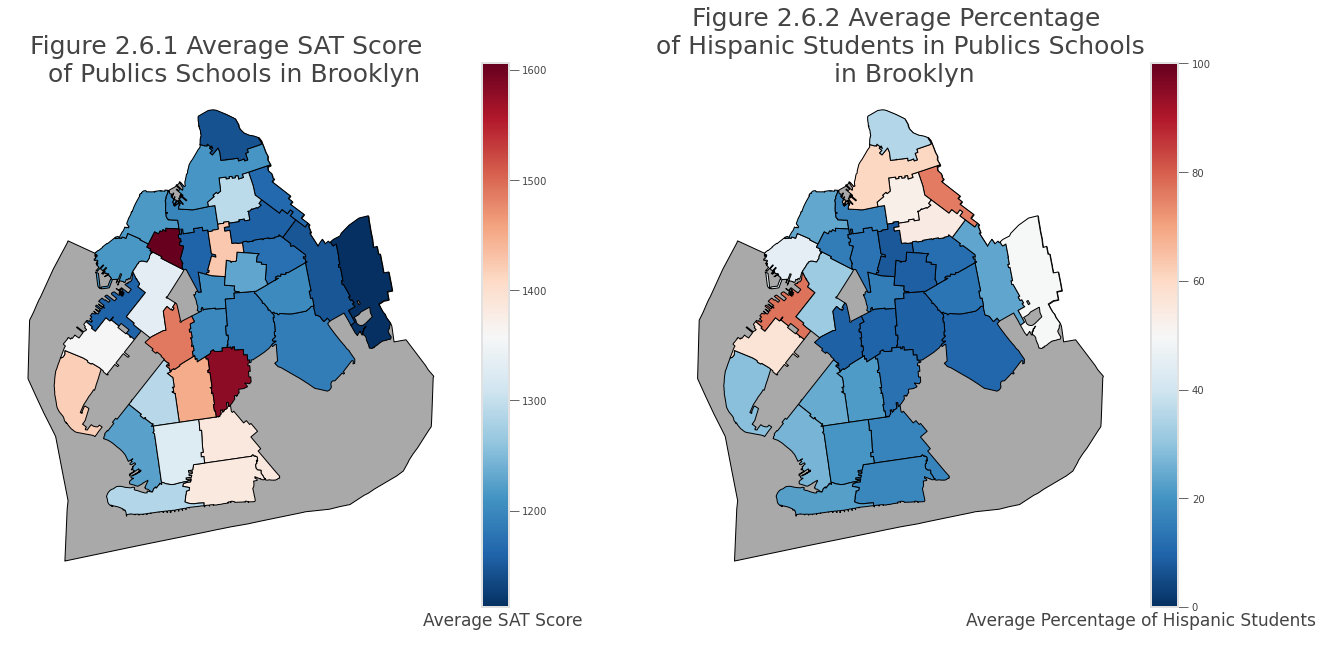

In [168]:
# Plot Average Percentage of Hispanic students for each zip code in Kings County with Average SAT score side-by-sidem
map_plot1(satdf,'Brooklyn', 'Percent Hispanic', '2.6.1', '2.6.2')
plt.show()

The plot above relates the average SAT score and the average percentage of Hispanic students at schools in the Kings County. 

From the plot, some regions where the average percentage of Hispanic students is high have lower average SAT score. But compared with `Percent Black`, the correlation between `Percent Hispanic` and `Average SAT Score` is weaker since the contrast of colors between maps is less significant than the previous one. This implies that there may be a weak negative correlation between `Percent Hispanic` and `Average SAT Score`.

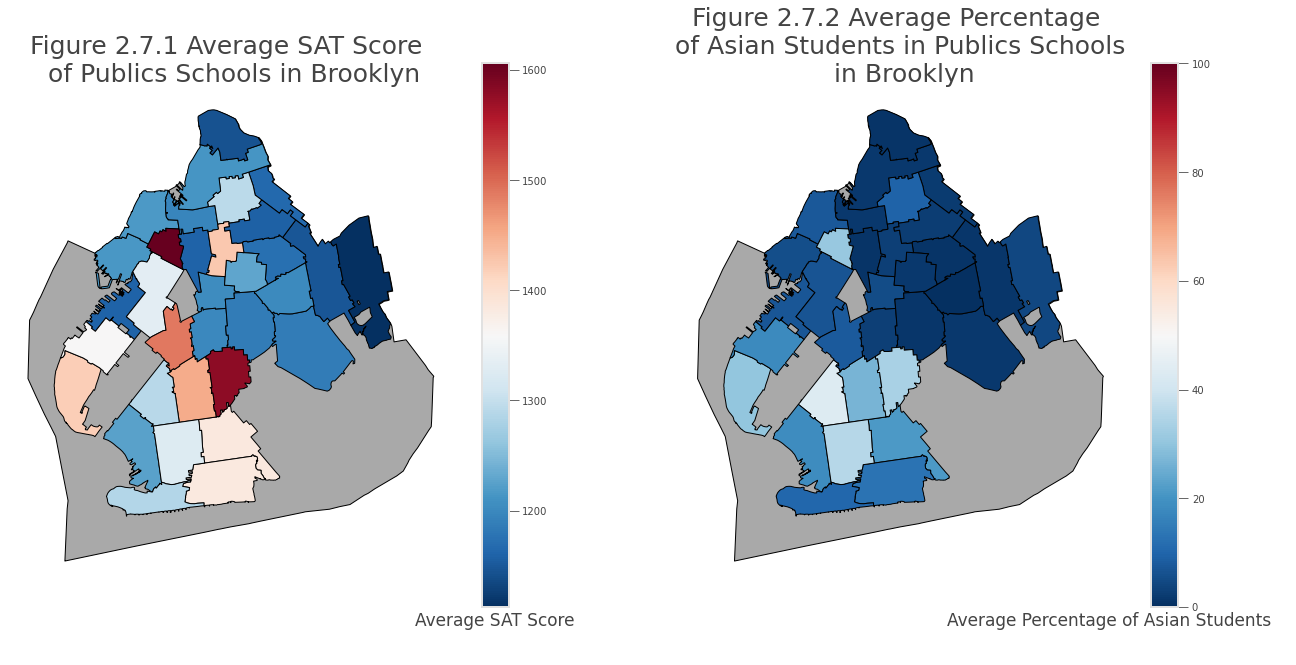

In [169]:
# Plot Average Percentage of Asian students for each zip code in Kings County with Average SAT score side-by-side
map_plot1(satdf,'Brooklyn', 'Percent Asian', '2.7.1', '2.7.2')
plt.show()

The plot above relates the average SAT score and the average percentage of Asian students at schools in the Kings County. 

From the map on the right, the northeast public schools of the county has an extremely low proportion of Asian students, which is below 10%. And see that the average SAT score of the corresponding region is not significantly high, except for area with zip code 11216. For the rest parts, some regions where the average percentage of Asian students is low have higher average SAT score. This implies that there may be a moderate or weak negative correlation between `Percent Asian` and `Average SAT Score`.

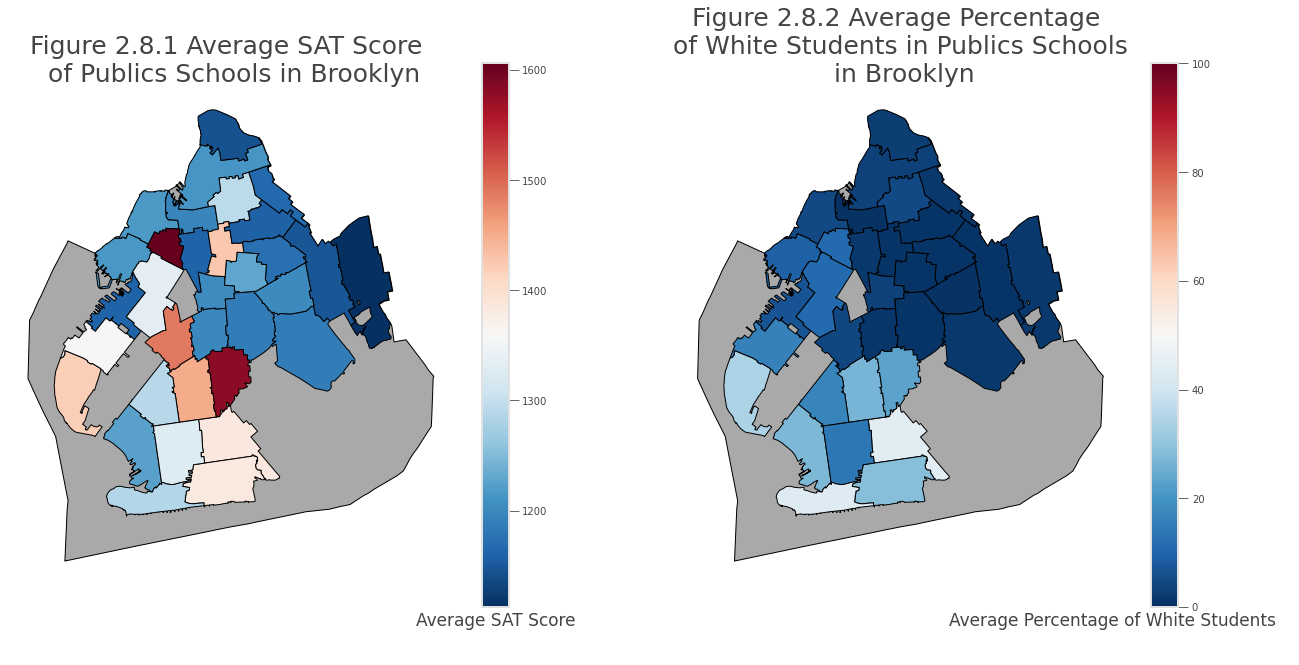

In [170]:
# Plot Average Percentage of White students for each zip code in Kings County with Average SAT score side-by-side
map_plot1(satdf,'Brooklyn', 'Percent White', '2.8.1', '2.8.2')
plt.show()

The plot above relates the average SAT score and the average percentage of White students at schools in the
Kings County.

The map on the right is almost the same as the one for `Percent Asian` , with few differences. Similarly, the
northeast public schools of the county have an extremely low proportion of White students, which is below 10%.
And see that the average SAT score of the corresponding region is not significantly high, except for the area with zip
code 11216. For the rest parts, some regions where the average percentage of White students is low have
a higher average SAT score. This implies that there may be a moderate or weak negative correlation between
`Percent White` and `Average SAT Score`.

### Maps with Bokeh Library
The HTML to my project is https://drive.google.com/file/d/1pgCVnYsvolYm879uqKgZ0m4XOHkcK-oG/view?usp=sharing (in Google Drive).

In [171]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

Loading BokehJS ...

In [172]:
# Average SAT grades for each zip code in Kings County
dfzc = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Average SAT Score"]].groupby("Zip Code").count().rename(
    columns = {"Average SAT Score": "Num"}).reset_index()
satdf11 = satdf.query("Borough == 'Brooklyn'")[['Zip Code', 'Percent White', 'Percent Black', 'Percent Hispanic', \
                                                'Percent Asian', "Average SAT Score"]].groupby("Zip Code").mean().reset_index()
# merge with the zipfile, keep the df with less info, check for column info before merging
mdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf11, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
mdf.head()

hoverdf = pd.merge(mdf, dfzc, left_on = "Zip Code", right_on = "Zip Code", how = "outer") 
hoverdf = hoverdf.rename(columns = {"Percent White": "White", "Percent Black": "Black", "Percent Hispanic": "Hispanic",\
                       "Percent Asian": "Asian"})

In [173]:
#Convert data to geojson for bokeh
kings_geojson = GeoJSONDataSource(geojson = hoverdf.to_json())
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 1150, high = 1600)
color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal')

hover = HoverTool(tooltips = [ ('Zip Code','@ZCTA5CE10'), ('Percentage of White Students', '@White'),
                              ('Percentage of Black Students', '@Black'),
                               ('Percentage of Hispanic Students','@Hispanic'),
                               ('Percentage of Asian Students', '@Asian'),
                              ('Total Number of Schools','@Num')])

p = figure(title = "Figure 2.9 Average SAT Score in Parts of Brooklyn by Zip Codes", tools = [hover])
p.patches("xs", "ys", source = kings_geojson, fill_color = {'field' :'Average SAT Score', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

The color in the plot above indicates the zip code-level mean of average SAT scores in parts of Kings County.
The locations that have no public school included in the dataset is not shown. Besides, when the cursor is
moved to the region, regional information of average proportion of White, Black, Hispanic, Asian students and
number of public schools recorded will display.

For the most southern and middle part of Kings county, only 1 or 2 public schools is included in the dataset.
Therefore, the correlation between minority shares and average SAT scores of schools in that particular region
will be overrepresented by the school in our sample. For example, places with zip code 11216 and 11217 are
mentioned as exceptions multiple times above. And the numbers of schools recorded in that region are 1 and 2
respectively. In the future analysis, data like these may be considered as outliers and excluded from the analysis.

The number of schools recorded in the northern region is higher on average. Therefore, we are more confident
at commenting on the correlation between ethnicity distributions and the average SAT scores in that region. The
overall average SAT score for Brooklyn is around 1200, from the plot, this value is largely affected by the lower and
larger size of values collected from northeast public schools.

### Conclusion
In project two, my analysis focus on using the exploratory analysis to investigate deeper the relationship between
ethnic shares and average SAT scores of NYC public schools. The visualizations have provided more information
about the data and provide more clues to the association between 2 variables. 

First, the problem of overrepresentation exists in the dataset as ome regions only have one
school included in the dataset and not all zip codes have schools from it included in the dataset. Second, location is a confounder in the relationship of ASES and students’ performances. Precisely, for Brooklyn, the school's average SAT score is largely correlated to the percentage of Black students, moderately to `Percent Asian` and `Percent White`, and weakly to `Percent Hispanic`. This pattern might differ for borough Staten
Island since its distribution of ethnicity groups is distinct from the other four boroughs. Third, still, there are
schools and places in Kings County missing from the dataset, we cannot draw a conclusion with 100%
confidence. The analysis with maps for the other 4 boroughs would be of the same measure.

# Project Three

## Introduction
In previous projects, I have found weak correlations between ASES and students' performance. In this project, I will merge my original dataset with a new dataset on regional population scraped to get more
insight into how the ethnicity distribution affects regional average SAT score. I want to investigate how local population differs the influence of ASES on student performances in the Brooklyn Borough.

I will scrape the data first and then
merge and visualize it for further analysis.

### THE MESSAGE 

My question would be "Does funding allocated and other related school features of schools affect students' SAT performances?" I believe the dataset with school-level information, such as graduation rates, financial reports, Annual Professional
Performance Review (APPR) Ratings, etc. will be helpful for investigating the relationship between ASES and students' average SAT scores. Because 1)these are also potential influencers on the students'
performances in SAT tests. That is, students in schools with more fundings/higher graduation rates/ more Highly
Effective teachers in APPR ratings tend to have higher SAT scores. And 2)these factors are likely to be
correlated with minority shares. Precisely, if strong discrimination exists, it is likely that fewer funds will be allocated
to schools with more minorities.

The data can be obtained from https://data.nysed.gov/lists.php?type=school (https://data.nysed.gov/lists.php?type=school). Take Bard High School Early College as an example, to get its teachers' APPR Ratings for 2014-
2015 school year, we need to search for the school in the list and then click Archive and find the 2014-2015 school
year. A list of available reports of the school for that year can be seen. And here is the webpage can be scraped
for Bard High School Early College's APPR Ratings in the 2014-2015 school year:
https://data.nysed.gov/evaluation.php?year=2015&instid=800000043426&report=appr
(https://data.nysed.gov/evaluation.php?year=2015&instid=800000043426&report=appr).

I will get the data for each school and merge it with the existing data set by school names. I could also try merging
my dataset with the district/zip code level data if merging by school names is tedious and unnecessary. If I could run a
regression of average SAT scores on minority shares, then the newly scraped data will be added to the
regression as controls. Also, it is possible to investigate whether minority affects average SAT scores indirectly
through some of the factors added, such as the funding I mentioned above.

### Web Scraping 
I don't need to run the program over time to generate the data since I only want data for the 2014-2015 school
year and it had already been collected and released. 
I think I cannot scrape the webpage for the following reasons:
1. To get the data, I need to search for each school in the list at first and then click archive to find the relevant list for the school year. Currently, I am not capable of fully automate this process and I can by far scrape the final website.
2. Names of some schools in the data set are not the same as those in the website. For example, shool Clinton School Writers and Artists cannot be found in the list. I need to read the address of schools in the dropdown list to determine which one is the school I am looking for.

Therefore, I need to learn how to do web scraping when I need to search and locate the data at first and also
how to put the code of selecting the most likely school when no perfect match exists in the first stage.

In the following, I will scrape the data from the practice website instead. The data is New York Zip Codes by
Population and the website to be scraped is https://www.newyork-demographics.com/zip_codes_by_population
(https://www.newyork-demographics.com/zip_codes_by_population). I will later merge the scraped data with the
existing one by zip code.

#### Step 1
To request the web content for the webpage using the `requests` library. Use the `get()` method to request for getting the content of the webpage. 
Before continuing, I need to check if the request is successful. For successful responses, the status code is between 200 and 299.

In [174]:
import requests
web_url = 'https://www.newyork-demographics.com/zip_codes_by_population'
response = requests.get(web_url)

#### Step 2
To get a structured soup object, I pass the response content to `BeautifulSoup()` method, which is imported from library `bs4`. The library is for parsing through HTML content and understanding the complete structure of the content.

In [175]:
# Create soup object
from bs4 import BeautifulSoup
soup_object = BeautifulSoup(response.content)

#### Step 3
Since I only want the elements about the table, I need to find out the relevant HTML tag and corresponding class name. Using the `Inspect` option of my browser, I found the tag is `<table>` and the class name is `'ranklist'`.

Then, I use the `find_all()` method to search for the web content directly in the soup object. Since every row of the table is enclosed under the HTML tag `<tr>`, which means `table row`, I make `'tr'` the input of `find_all()` to extract a list of all row values from the soup object created in Step 2.

In [176]:
data_table = soup_object.find_all('table', 'ranklist')[0]
data_table
all_values = data_table.find_all('tr')

#### Step 4
The final step is to have all the values in the table in a data frame `zip_pop`. 3 steps are needed to achieve this:
1. Create an empty data set and specify the column names as given by the 1st element in the list obtained in Step 3.
2. Create an index variable that keeps track of which row in the data frame does the information goes.
3. Make a for loop and load all the information into the empty data frame row by row. Within each loop, I use 
    - `find_all()` again to extract all elements enclosed in tag `<td>`, which means a standard data cell in an HTML table;
    - `text()` to just pick the text part from the tag;
    - `replace()` and `split()` methods to shape the information picked above, and convert it to strings to be inputed to the data frame.
    - if statement and another for loop to create extra rows for zip codes that are tie in ranks

To stored the data as a csv file, `to_csv()` can be used.

In [177]:
import pandas as pd
zip_pop = pd.DataFrame(columns = all_values[0].text.replace("\n", "#").split("#")[1:-1])
ix = 0
# notice that the last element is not needed
#all_values[-1]

for row in all_values[1:-1]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    rank = float(values[0].text.replace("\n", "").split()[0].replace(",", ""))
    pop = float(values[2].text.replace("\n", "").split()[0].replace(",", ""))
    zcode = values[1].text.replace("\n", "")
    if len(zcode) > 5: #more than 1 zip code in the cell
        zcodel = zcode.split(" ") #get a list
        for zi in range(len(zcodel)):
                if len(zcodel[zi]) == 5:
                    zip_pop.loc[ix] = [rank, zcodel[zi], pop] # Store info in the dataframe as a row
                    ix += 1
                if len(zcodel[zi]) == 6: #has comma at the end
                    zip_pop.loc[ix] = [rank, zcodel[zi][:-1], pop] # Store info in the dataframe as a row
                    ix += 1
    else:
        zip_pop.loc[ix] = [rank, zcode, pop] # Store info in the dataframe as a row
        ix += 1
    
# Print the first 5 rows of the dataframe
zip_pop.head(5)

,Rank,Zip Code,Population
0,1.0,11368,112088.0
1,2.0,11385,107796.0
2,3.0,11211,103123.0
3,4.0,11208,101313.0
4,5.0,10467,101255.0


### Merge And Analysis

In [178]:
popdf1 =  pd.merge(satdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", how = "inner").sort_values(\
                                        'Population', ascending = False).reset_index().drop( "index", axis = 1)
popdf1.head(5)

,School Name,Borough,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,Average SAT Score,TDiff,Rank,Population
0,High School for Arts and Business,Queens,Corona,11368,40.73742,-73.85331,8:45 AM,4:00 PM,870.0,4.1,7.8,77.2,10.2,76.7,1211.0,7.25,1.0,112088.0
1,Grover Cleveland High School,Queens,Ridgewood,11385,40.71122,-73.90865,8:30 AM,3:15 PM,1828.0,18.9,4.5,65.7,9.7,38.9,1290.0,6.75,2.0,107796.0
2,Williamsburg Preparatory School,Brooklyn,Brooklyn,11211,40.71504,-73.95465,8:15 AM,3:15 PM,682.0,10.0,16.4,69.6,2.6,87.8,1313.0,7.00,3.0,103123.0
3,"High School for Enterprise, Business, and Tech...",Brooklyn,Brooklyn,11211,40.71196,-73.94043,7:45 AM,3:45 PM,1001.0,2.5,36.1,56.9,4.0,54.5,1334.0,8.00,3.0,103123.0
4,PROGRESS High School for Professional Careers,Brooklyn,Brooklyn,11211,40.71196,-73.94043,8:00 AM,2:45 PM,1098.0,0.8,35.1,62.6,1.0,44.9,1141.0,6.75,3.0,103123.0


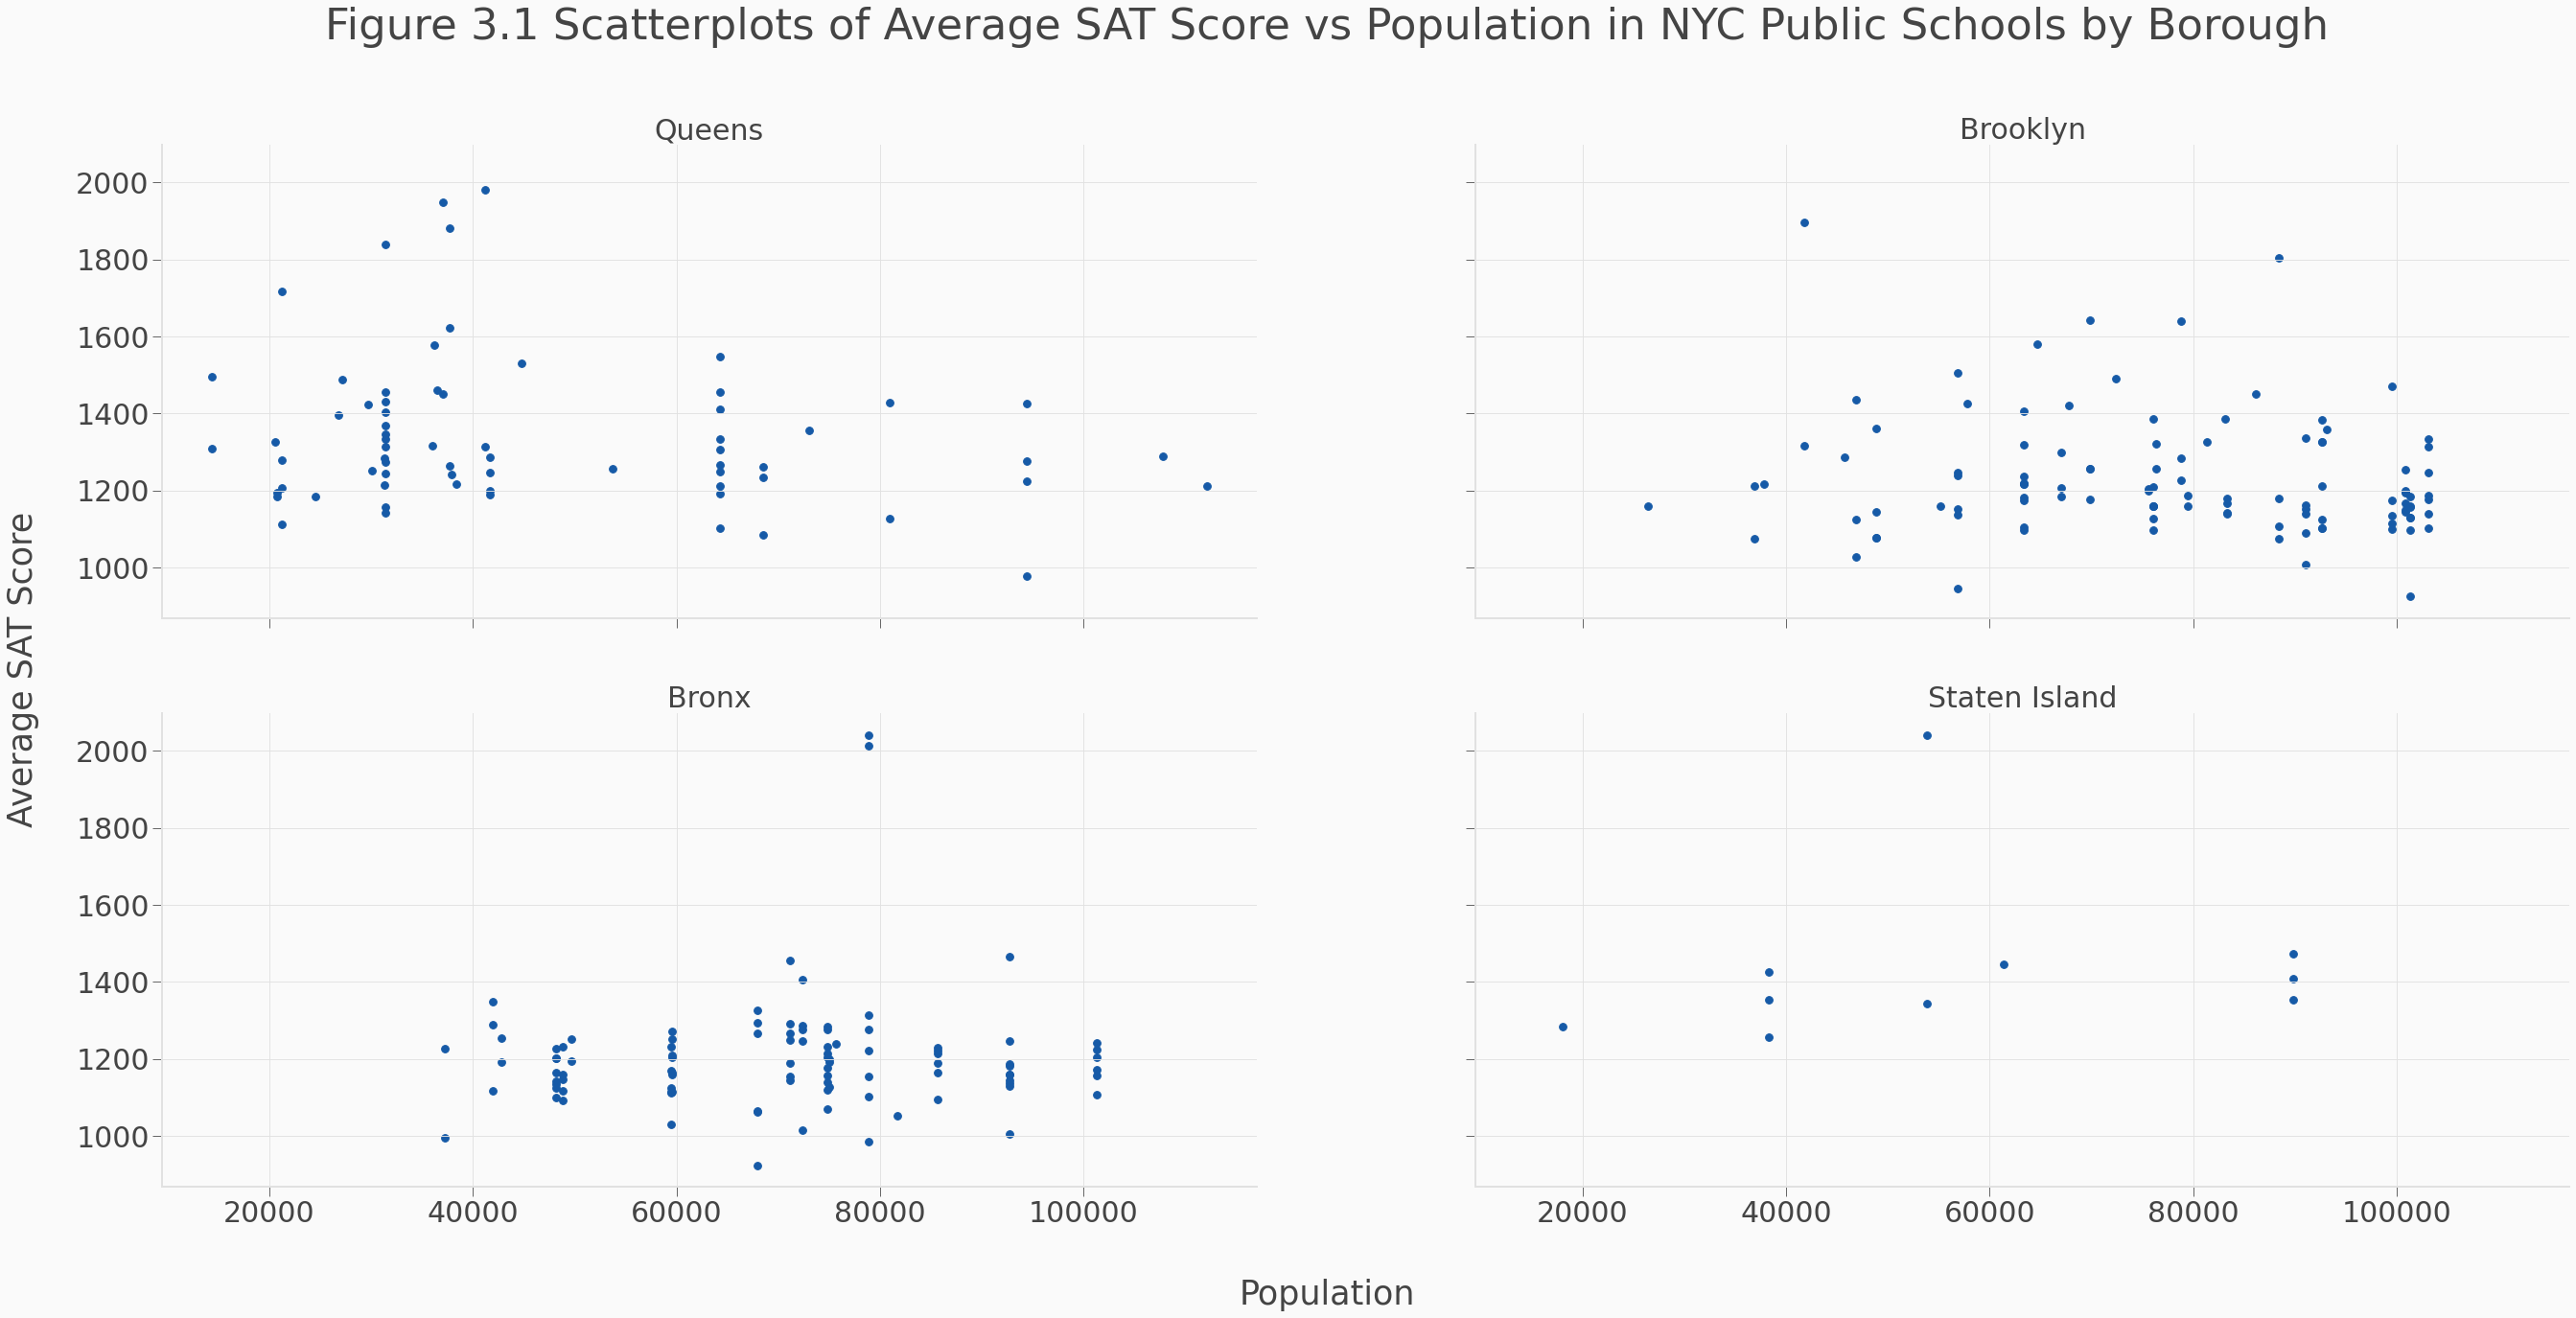

In [179]:
# scatterplots for scores by borough vs population (4 boroughs here)

def single_scatter_plot2(df, b, ax):
    """
    This function creates a single scatterplot of average SAT score against the population
    """
    # Filter data to keep only the data of interest
    _df = df.query("Borough == @b")[["Average SAT Score", "Population"]]
    _df.plot(kind = "scatter", x = "Population", y = "Average SAT Score", ax = ax, fontsize = 30, s = 60)

    return ax


fig, ax = plt.subplots(2, 2, figsize = (45, 20), sharey = True, sharex = True)
bgcolor = (250/255, 250/255, 250/255)
k = 0
# use a for loop to construct the plot for each Borough
for i in range(2):
    for j in range(2):
        single_scatter_plot2(popdf1, popdf1.Borough.unique()[k], ax[i, j]) 
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_facecolor(bgcolor) 
        ax[i, j].set_title(str(popdf1.Borough.unique()[k]), fontsize = 30)
        k += 1
#fine-tune and set the labels and title    
fig.text(0.5, 0.04, 'Population', ha = 'center', fontsize = 35)
fig.text(0.075, 0.5, 'Average SAT Score', va = 'center', rotation = 'vertical', fontsize = 35)
fig.set_facecolor(bgcolor)
fig.suptitle("Figure 3.1 Scatterplots of Average SAT Score vs Population in NYC Public Schools by Borough", fontsize = 45)
plt.show()

From 4 scatterplots above, there is no clear relationship between population and average SAT scores of schools
in that borough. In Queens, Bronx,and Brooklyn boroughs, the regional average scores fluctuate within the same
range for different population under each zip code. A weak positive correlation can be drawn from the plot for Staten Island borough. But since there is little information for this Borough, this relationship may be overrepresented and biased by the 10 schools included in the dataset.

In the following, I will merge my original data of the Brooklyn borough with the scraped data of the population and do
a deeper analysis of the problem of interest. And as in the previous project, the analysis will focus on the Brooklyn
borough.

In [180]:
popdf2 = pd.merge(mdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", \
                 how = "inner").sort_values('Population', ascending = False).reset_index().drop(["ZCTA5CE10", "index"],\
                                                                                                axis = 1)
popdf2.head(5)

,geometry,Zip Code,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average SAT Score,Rank,Population
0,"MULTIPOLYGON (((-73.95560 40.72404, -73.95551 ...",11211,3.142857,33.071429,60.671429,1.914286,1214.571429,3.0,103123.0
1,"POLYGON ((-73.88909 40.68464, -73.88829 40.685...",11208,1.785714,42.600000,49.757143,4.371429,1112.428571,4.0,101313.0
2,"POLYGON ((-73.92161 40.64169, -73.91973 40.642...",11236,1.814286,84.071429,10.428571,1.671429,1187.571429,6.0,100844.0
3,"POLYGON ((-73.96755 40.64768, -73.96666 40.648...",11226,1.380000,84.840000,9.680000,2.840000,1199.400000,7.0,99558.0
4,"POLYGON ((-74.03847 40.63568, -74.03714 40.638...",11220,16.300000,7.700000,56.700000,18.000000,1360.000000,10.0,93170.0


### Visualization

First, I want to make a bar plot about the population of each area (by zip code). The vertical red line indicates the mean population of Brooklyn borough.

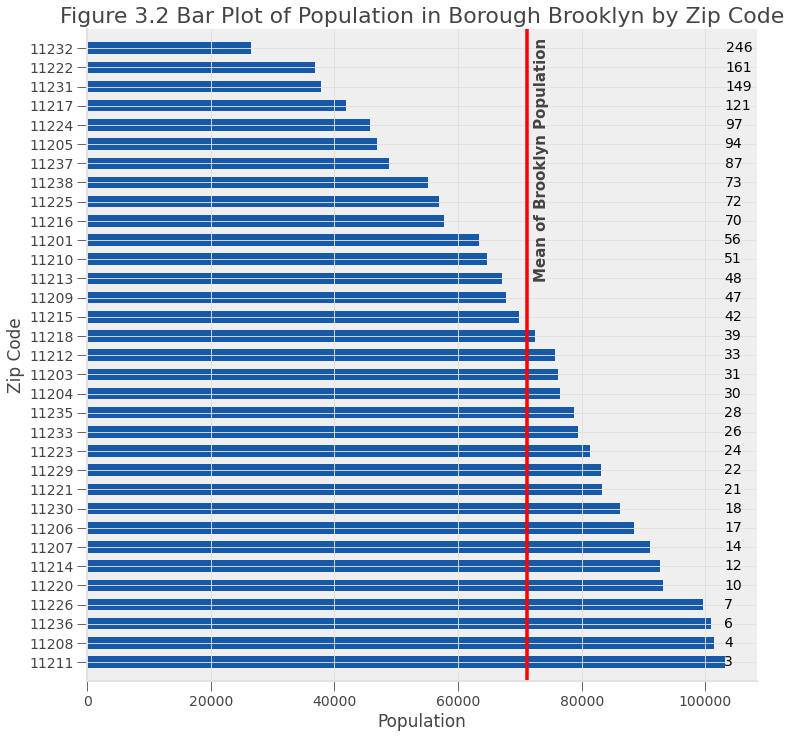

In [181]:
plt.figure(figsize = (12, 12))

plt.barh(popdf2["Zip Code"], popdf2["Population"], height = 0.6)
plt.title("Figure 3.2 Bar Plot of Population in Borough Brooklyn by Zip Code", fontsize = 22)
plt.xlabel("Population", fontsize = 17)
plt.ylabel("Zip Code", fontsize = 17)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.vlines(popdf2["Population"].mean(), -1.0, 33.0, color = "r", linewidth = 3.5)
plt.text(popdf2["Population"].mean() + 1000, 20, 'Mean of Brooklyn Population', fontsize = 15, fontweight = 'bold',\
         rotation = 90)
# add the rank of population for each zip code in Borough Brooklyn to the end of the bar
t = popdf2['Rank']
for i, v in enumerate(t):
    plt.text(v + 103000, i, int(v), color ='black', fontsize = 14, ha = 'left', va = 'center')

plt.margins(y = 0)   
plt.show()

From the bar plot above, see that
1. the range of the population in Brooklyn borough is large. Precisely, the smallest regional population is about a quarter of the biggest one;
2. there is a larger variance in population for areas with a population below the average than for those with population above the average;
3. there are some differences in ranks between areas next to each other in the chart, except for areas near the top (e.g. zip code 11232 and 11222).

Second, I want to investigate whether there is a relationship between zip code-level SAT score, population and
distribution of ethnicity. Recall from last project, number of southern part schools recorded in the dataset is lower
(1 or 2) than that of other parts in the borough as well as region 11216, therefore, it is possible that different
patterns can be seen from the plot. And when that happens, patterns drawn from most regions above the middle
should be more accurate since small sample size increases the biasdness in the results.

In [182]:
# write a function for having 3 maps side-by-side
def map_plot2(df, b, r, label1, label2, label3, numx):
    """
    This function plots maps of average SAT score, population, and distribution of ethnic group r in borough b side-by-side.
    The plots will be labelled separately.
    The annotation of last plot need to be adjuested by numx in the x-direction.
    """
     # Filter data to keep only the data of interest
    _df = df.query("Borough == @b")[["Zip Code", r]].groupby("Zip Code").mean().reset_index()
    pdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], _df, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
    
    fig, gax = plt.subplots(figsize = (20, 10), ncols = 3)
    
    # plot the map of average SAT score for borough b by zipcode
    county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
    mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r',\
            legend_kwds = {'shrink': 0.7})
    # add labels and title
    gax[0].annotate('Average SAT Score', xy = (0.17, 0.13),  xycoords = 'figure fraction', fontsize = 17)
    gax[0].set_title('Figure '+ label1 +' Average SAT Score \n in ' + b, fontsize = 17)
    gax[0].axis('off')
    
    # plot the map of population for borough b by zipcode
    county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
    popdf2.plot(ax = gax[1], edgecolor = 'black', column = 'Population', legend = True, cmap = 'RdBu_r',\
            legend_kwds = {'shrink': 0.7})
    # add labels and title
    gax[1].annotate('Population', xy = (0.53, 0.13),  xycoords = 'figure fraction', fontsize = 16)
    gax[1].set_title('Figure '+ label2 +' Population \n in '+ b +' by Zip Code', fontsize = 16)
    gax[1].axis('off')

    # plot the map of average percentage of r student in borough b
    race = r.split(" ")[1]
    county_df.plot(ax = gax[2], edgecolor = "black", color = "darkgrey") 
    pdf.plot(ax = gax[2], edgecolor = 'black', column = r, legend = True, cmap = 'RdBu_r' ,\
            legend_kwds = {'shrink': 0.7}, vmin = 0, vmax = 100)
    # add labels and title
    gax[2].annotate(\
    'Average Percentage of '+ race + ' Students', xy = (0.76+numx, 0.13),xycoords = 'figure fraction', fontsize = 15)
    gax[2].set_title(\
    'Figure '+ label3 + ' Average Percentage \n of '+ race +' Students in Publics Schools \n in '+ b, fontsize = 15)
    gax[2].axis('off')

    return ax


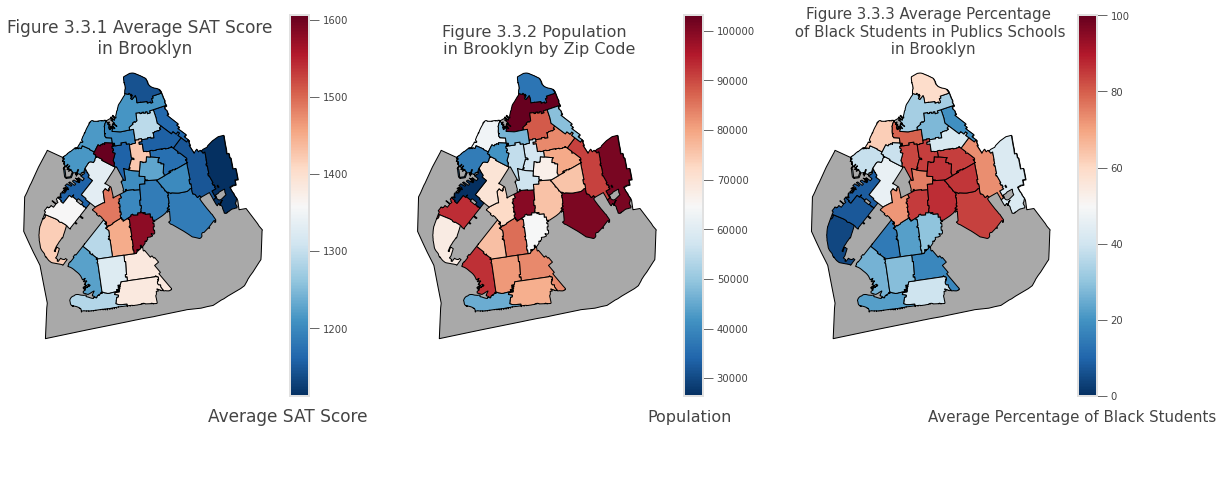

In [183]:
# Plot Average SAT Score, Population and Percent Black for each zip code in Kings County side-by-side
map_plot2(satdf, 'Brooklyn', 'Percent Black', '3.3.1', '3.3.2', '3.3.3', 0)
plt.show()

From the map above, see that for the top and middle part of the borough, the average SAT score tend to be low if one of the population and Black percent is high, and vice versa. This pattern is the same for the southern parts, and the average SAT score is mainly affected by population since the percentage of Black students there is generally low.
Besides, in the most northeast part of the borough, the average SAT score is more inversely correlated with population than to the Percent Black whereas in the rest of the northeastern parts, Percent Black is more correlated with the average score.

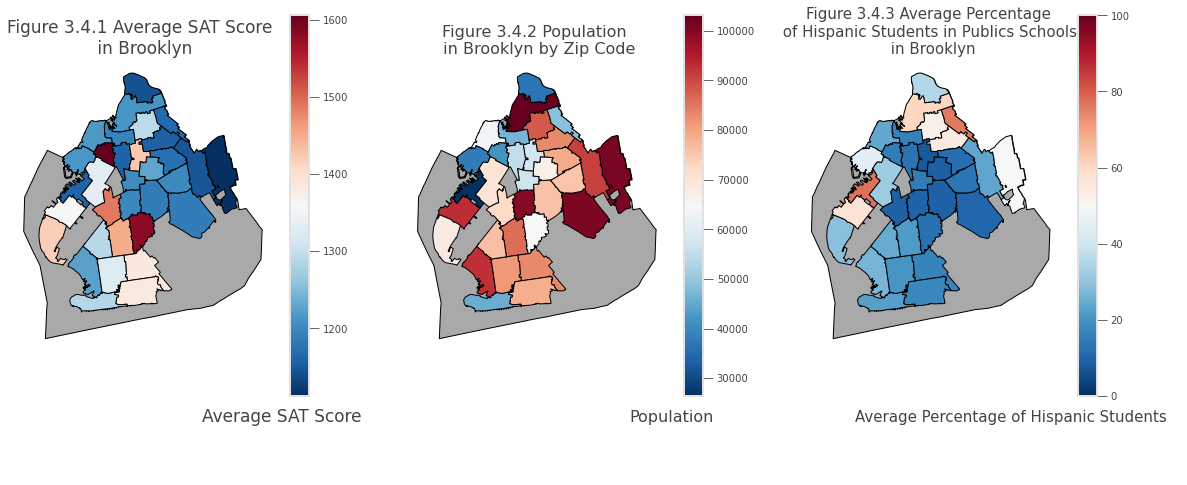

In [184]:
# Plot Average SAT Score, Population and Percent Hispanic for each zip code in Kings County side-by-side
map_plot2(satdf, 'Brooklyn', 'Percent Hispanic', '3.4.1', '3.4.2', '3.4.3', - 0.04)
plt.show()

From the map above, see that the average SAT score tend to be low if one of the population and Hispanic percent is high, and vice versa. And since the percentage of Hispanic students is generally low, the average SAT score is mainly affected by the regional population. Although there are exceptions (such as regions with zip codes 11209 and 11216), since they are in the southern part, I should still conclude that my finding is trustworthy according to the analysis at the beginning of the section.

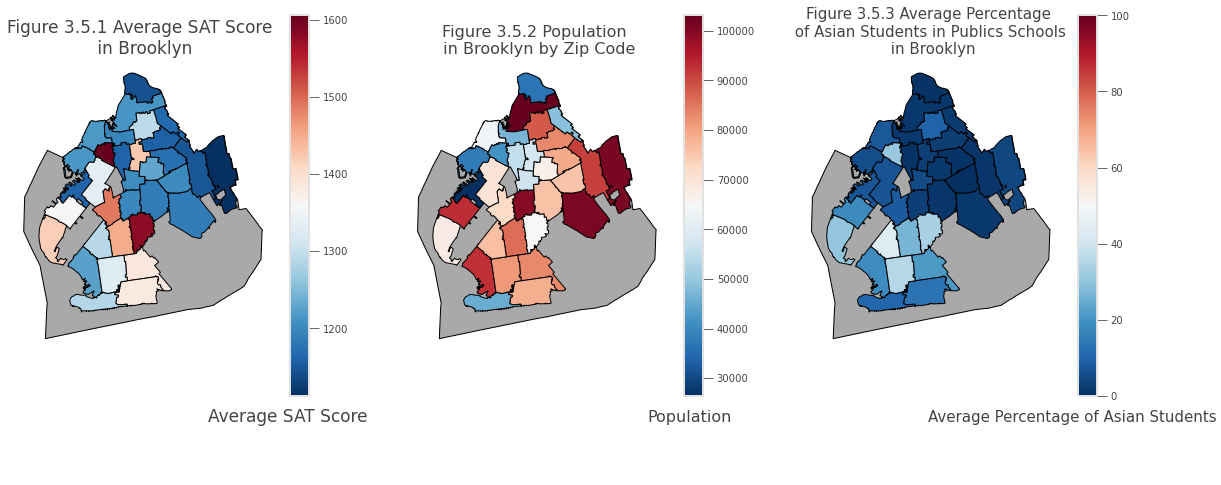

In [185]:
# Plot Average SAT Score, Population and Percent Asian for each zip code in Kings County side-by-side
map_plot2(satdf, 'Brooklyn', 'Percent Asian', '3.5.1', '3.5.2', '3.5.3', 0)
plt.show()

For Asian Percent, the average SAT score tend to be relatively low if either the population or Asian percent is relatively high, and vice versa. Also, since the percentage of Asian students is generally low, the average SAT score is mainly affected by the regional population. Some exceptions in regions with small number of schools contained in the dataset is ignored.

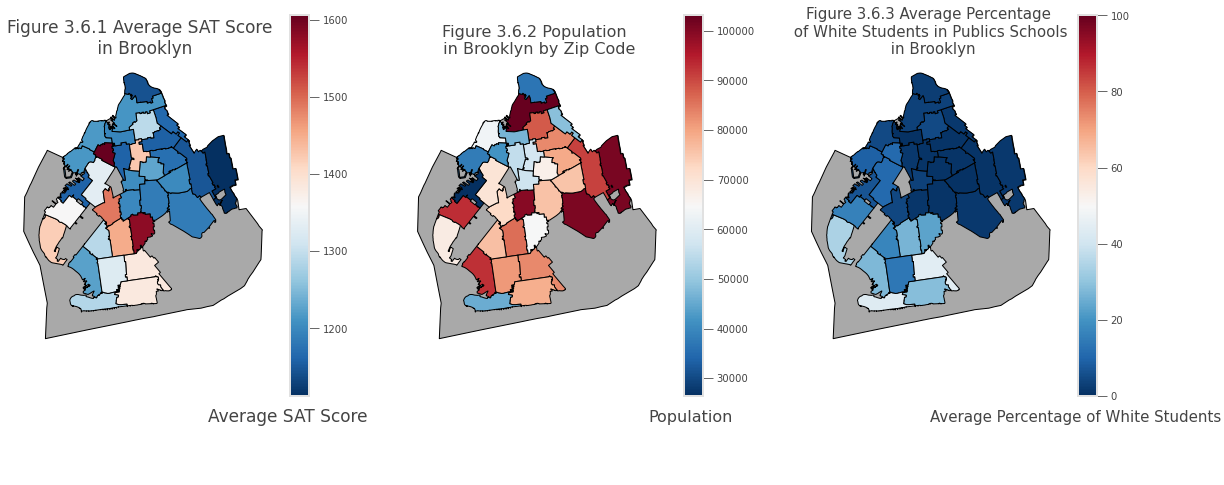

In [186]:
# Plot Average SAT Score, Population and Percent White for each zip code in Kings County side-by-side
map_plot2(satdf, 'Brooklyn', 'Percent White', '3.6.1', '3.6.2', '3.6.3', 0)
plt.show()

Similarly, the average SAT score tend to be relatively low if either the population or Asian percent is relatively high, and vice versa. Also, the average SAT score is mainly affected by the regional population sice the percentage of Asian students is generally low (just like Hispanic Percent and Asian Percent). Some exceptions in regions with small number of schools contained in the dataset is ignored.

## Conclusion

I have three findings after summarizing findings in the three projects. First, for the Borough Brooklyn, `Percent Black` and `Percent Hispanic` were generally high whereas `Percent Asian` and `Percent White` were relatively low, especially in areas above the middle of the Borough. This implies that overall, schools there have low ASES and the average SAT scores of these regions were thus affected. Second, for the northeast and middle region of the Borough, the average SAT score was affected by population and the percentage of Black and Hispanic students, as well as the ASES: the average score was low when ASES was low. Third, for the rest part of the Borough, the score tend to be inversely correlated with the population. But since not many schools in that region were included in the dataset, this result may not be accurate and significant. 
The analysis for the other Boroughs will use the same measure and similar way of comparison and interpretation.

# Final Project

In the last project, I will use OLS and regression tree from machine learning to investigate the relationship between school characteristics, mainly the ASES, and the average SAT scores. Using regressions enables me to investigate the effect of more than one school characteristics and thus compare their influences with each other. I can also use the t-test to test the significance of the result and evaluate whether the findings is representative for the entire population.

Regressions show a clearer pattern (than maps, scatterplots, bar charts, and histogram) between more than 2 variables and provide data-supported evidence for the relationship between relevant school characteristics and school-level average SAT scores. 

## OLS Regression

In the first project, I determined that the average SAT score of school is the dependent variable Y and minority shares are the independent variables. Based on previous analyses, I believe there is a linear relationship since 1) the correlation of two variables (calculated in Project One) is not 0, 2) Figure 2.3 shows that there is a linear relationship between minority shares and average SAT scores for some Boroughs, and 3) the analysis of the relationship by comparing maps in Project Two found there is association between two variables. 
However, the relationship is not very strong since the analysis in Project Two and Project Three found that location and population both have effects on the average SAT score. They can be seen as the confounder when estimating the linear relationship between ASES and average SAT score.

The X's would be `Percent White`, `Percent Black`, `Percent Hispanic`, `Percent Asian`, `Population`, `Student Enrollment`, `Percent Tested`, and the number of hours at school (`TDiff`). 
The first 4 variables are used as the proxy of ASES of the school and their relationship with the average SAT score is the main consideration of the project. The reason why I do not use the average of `Percent Black` and `Percent Hispanic` as proxy for ASES here is that, from Figure 1.5, the distributions of two percentages are not consistent all the time. It is possible that the percentages of different groups have different effect on the outcome.  

Population (of each zip code) has been analyzed in Project 3 and its relationship with scores was found. Student enrollment, percentage of students took SAT, and the number of hours at school are also correlated with the test performance. Because, in generally, schools with better teaching quality tend to have more enrollments and make more students willing to take the SAT to continue studying through undergraduate programs of universities or colleges. Meanwhile, longer `TDiff` enables students to study more and perform better in SAT. As these X's all tend to influence Y, they need to be included into the regression. 

Also, since the main focus is the effect of minority shares, the last four variables can be seen as controlls. Including them enables the regression to get a less biased estimate of relationship between ASES and average SAT scores.
I will double-check the validity of my model with 2 regressions below.

First, I will run
$$
\text{Average SAT Score} = \beta_0 + \beta_1 \text{Population} + \beta_2 \text{Student Enrollment} + \beta_3 \text{Percent Tested} + \beta_4 \text{Hours Spent at School} + \epsilon
$$
Because the population data are for each zip-code (clustered at zip-code level), not for each individual school, I want to double-check whether there is a linear relationship between population and the average SAT score of each school within that area as I considered. Also, including `Student Enrollment`, `Percent Tested` and `TDiff` is also for checking if there is indeed an relationship with the SAT score.

In [187]:
x_c = popdf1[["Population", "Student Enrollment", "Percent Tested", "TDiff"]]
y = popdf1[["Average SAT Score"]]

reg = sm.OLS(endog = y, exog = x_c, missing = 'drop')
result = reg.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      Average SAT Score   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              6490.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:48:52   Log-Likelihood:                         -2411.9
No. Observations:                 374   AIC:                                      4832.
Df Residuals:                     370   BIC:                                      4848.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

From the output above, notice that the effect of population on average SAT score estimated using the sample is very small whereas that for the other coefficients are large. Besides, the p-value of `Population` is larger than 0.05, indicating that there is insufficient evidence for us to reject the $H_0$ that there is no correlation between `Average SAT Score` and `Population`. Thus, at the population level, there is insignificant association between the two. Also, the warning below tells me that 2 independent variables in the model are correlated. And this is what I am going to test below.

Second, I will run:
$$
\text{Population} = \beta_0 + \beta_1 \text{Student Enrollment} + \epsilon
$$
The population tend to positively correlate with the number of students enrolled in schools in that area. Having 2 correlated variables in the regression will bias the estimate. If there is a relationship, I will exclude `Population` from the final regression.

In [188]:
x_c2 = popdf1[["Student Enrollment"]]
y_2 = popdf1[["Population"]]

reg2 = sm.OLS(endog = y_2, exog = x_c2, missing = 'drop')
result2 = reg2.fit()
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:             Population   R-squared (uncentered):                   0.387
Model:                            OLS   Adj. R-squared (uncentered):              0.386
Method:                 Least Squares   F-statistic:                              235.8
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    1.36e-41
Time:                        18:48:52   Log-Likelihood:                         -4595.4
No. Observations:                 374   AIC:                                      9193.
Df Residuals:                     373   BIC:                                      9197.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

See that the p-value is small and the estimate of coefficient is large. This means that there is a significant correlation between `Population` and `Student Enrollment`. Thus, the X's I will choose would only be `Percent White`, `Percent Black`, `Percent Hispanic`, `Percent Asian`, `Student Enrollment`, `Percent Tested`, and `TDiff`. 
Now, after checking the independent variables, I will run 4 different regressions to analyze the question of interest.

The first regression model is:
$$
\text{Average SAT Score} = \beta_0 + \beta_1 \text{Percent White} + \beta_2 \text{Percent Black} + \beta_3 \text{Percent Hispanic} + \beta_4 \text{Percent Asian} + \beta_5 \text{Student Enrollment} + \beta_6 \text{Percent Tested} + \beta_7 \text{TDiff} + \epsilon
$$

This model includes all the relevant variables that are correlated with the independent variable. Including more relevant and valid covariates enables the model to better explain the dependent variable.

The second regression model is:
$$
\text{Average SAT Score} = \beta_0 + \beta_1 \text{Percent White} + \beta_2 \text{Percent Black*Student Enrollment} + \beta_3 \text{Percent Hispanic*Student Enrollment} + \beta_4 \text{Percent Asian} + \beta_5 \text{Percent Tested} + \beta_6 \text{TDiff} + \epsilon
$$

This model includes the interaction term of minority shares and the Student Enrollment. Since, in my opinion, the effect of minority shares on school-level average SAT also depends on the size of the school.

The third regression model is:
$$
\text{Average SAT Score} = \beta_0 + \beta_1 \text{Percent White}^2 + \beta_2 \text{Percent Black}^2 + \beta_3 \text{Percent Hispanic}^2 + \beta_4 \text{Percent Asian}^2 + \beta_5 \text{Student Enrollment} + \beta_6 \text{Percent Tested} + \beta_7 \text{TDiff} + \epsilon
$$

I fit a quadratic linear model here because from Figure 1.3.1 to 1.3.4, no clear straight line can be seen. Instead, there is some curvature. So, I start with the smallest degree greater than 1 to see if it improves the fit. 

The fourth regression model is:
$$
\text{log(Average SAT Score)} = \beta_0 + \beta_1 \text{Percent White} + \beta_2 \text{Percent Black} + \beta_3 \text{Percent Hispanic} + \beta_4 \text{Percent Asian} + \beta_5 \text{log(Student Enrollment)} + \beta_6 \text{Percent Tested} + \beta_7 \text{log(TDiff)} + \epsilon
$$

In this model I log transformed all variables that are not in percentages. This enables me to investigate the percentage change in variables on percentage change of the average SAT Score. This would make my interpretation of the effect more specific.

In [189]:
# Running 4 MLR together

# Add constant term to dataset
popdf1['const'] = 1

# Creat columns for variables used in regression
popdf1['Black_Int'] = popdf1['Percent Black']*popdf1['Student Enrollment']/100
popdf1['Hisp_Int'] = popdf1['Percent Hispanic']*popdf1['Student Enrollment']/100

popdf1[['Wsq', 'Bsq', 'Hsq', 'Asq']] = popdf1[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']]**2

popdf1[['Log SAT Score', 'logenrol', 'logdiff']] = np.log(popdf1[['Average SAT Score', 'Student Enrollment', 'TDiff']])

# Create y's to be used in each regression
y1 = y2 = y3 = popdf1["Average SAT Score"]
y4 = popdf1['Log SAT Score']

# Create lists of x's to be used in each regression
x1 = popdf1[['const', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Student Enrollment', \
            'Percent Tested', 'TDiff']]
x2 = popdf1[['const', 'Percent White', 'Black_Int', 'Hisp_Int', 'Percent Asian', 'Percent Tested', 'TDiff']]
x3 = popdf1[['const', 'Wsq', 'Bsq', 'Hsq', 'Asq', 'Student Enrollment', 'Percent Tested', 'TDiff']]
x4 = popdf1[['const', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'logenrol', 'Percent Tested',\
             'logdiff']]

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(y1, x1, missing='drop').fit()
reg2 = sm.OLS(y2, x2, missing='drop').fit()
reg3 = sm.OLS(y3, x3, missing='drop').fit()
reg4 = sm.OLS(y4, x4, missing='drop').fit()

In [190]:
from statsmodels.iolib.summary2 import summary_col
info_dict = {'AIC' : lambda x: f"{int(x.aic):d}",
             'BIC' : lambda x: f"{int(x.bic):d}",
             'Adjusted R-squared' : lambda x: f"{x.rsquared_adj:.2f}", 
             'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results = [reg1, reg2, reg3, reg4],
                            float_format = '%0.4f',
                            stars = True,
                            model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                            info_dict = info_dict,
                            regressor_order = ['const', 'Percent White', 'Wsq', 'Percent Black', 'Bsq', 'Percent Hispanic',\
                                               'Hsq', 'Percent Asian', 'Asq', 'Black_Int', 'Hisp_Int', 'Student Enrollment',\
                                               'logenrol', 'Percent Tested', 'TDiff', 'logdiff'])

print(results_table)


                     Model 1      Model 2     Model 3    Model 4  
------------------------------------------------------------------
const              2457.4222*** 792.9400*** 917.3343*** 7.7168*** 
                   (378.5694)   (86.4486)   (88.4040)   (0.2842)  
Percent White      -11.4722***  5.9371***               -0.0088***
                   (3.8097)     (0.5070)                (0.0027)  
Wsq                                         0.0667***             
                                            (0.0112)              
Percent Black      -16.3776***                          -0.0120***
                   (3.7272)                             (0.0026)  
Bsq                                         -0.0152***            
                                            (0.0044)              
Percent Hispanic   -16.9164***                          -0.0125***
                   (3.6784)                             (0.0026)  
Hsq                                         -0.0220***       

I will choose the fourth model based on 3 model selection measures:
1. Model 4's adjusted $R^2$ (adjusted for including a lot of covariates in the regression) is the highest among all four models. This shows that model 4 explains the data better than the other 3 models. The adjuest $R^2$ is 0.67, which means that my model (and the covariates) can explain 67% of the variations in the dependent variable.
2. The AIC and BIC of model 4 are smaller than the other 3. I want the AIC and BIC of the model to be as small as possible because AIC and BIC also penalize including more parameters to estimate in the model. 

With the same size of n and similar number of covariates, model 4 explains `Average SAT Score` the best. 

The intercept is estimated to be 7.7168. This means that the average SAT score for schools with no White, Hispanic, White and Asian students, 0% students took SAT, 1 enrollment and 1 hour of opening is exp(7.7168), about 2246. This is just a baseline value.

From p-values of the estimates, it can be seen that all the coefficient estimates are significant at 1% level, except for the logdiff (because 0.1 is greater than 0.01). This means that at the population level, these characteristics (except the number of hours students stay at schools) are all significantly correlated with the percentage change in average SAT scores. 

For 4 ethnic groups, their effects on the SAT outcome change are all negative and the magnitude of the change is larger and similar for minorities. For Percent White and Asian, their effects are also similar but less than that of the minorities. Precisely, on average, 10 percentage point increase in minority shares is associated with about 12% decrease in school level average SAT score. Where as 10 percentage point increase in Percent White and Asian correlates with 8.8% and 9.9% decrease. Therefore, at the population level, when ASES of school decreases, the school level average SAT score will decrease, and vice versa.

For the other significant characteristics, 1 percentage point increase in school enrollment and 10% increase in number of student took SAT are related to 4% and 2.3% increase in school level average SAT score. Since logdiff is insignificant, at the population level, the number of hours students stay at schools do not affect their SAT scores a lot.


## Machine Learning

Similar to linear regression, the objective of regression trees is to minimize the MSE. Precisely, starting from the top of the tree, to find the best split that minimizes the MSE by selecting $X_j$ and a cut-off s that reduce MSE the most. 

At each point, there will be two boxes $R_1$ and $R_2$: $R_1$ = $X$|$X_j$ < s & $R_2$ = $X$|$X_j$ $\geqslant$ s.

s is selected to minimize
$$
\sum_{i: X_i \in R_1} \left(\log(\text{Average SAT Score}_i) - \widehat{\log(\text{Average SAT Score}_{R_1})} \right)^2 + \sum_{i: X_i \in R_2} \left(\log(\text{Average SAT Score}_i) - \widehat{\log(\text{Average SAT Score}_{R_2})} \right)^2
$$

where $\widehat{\log(\text{Average SAT Score})}$ is calculated as

$$
\widehat{\text{log(Average SAT Score)}} = \hat{\beta_0} + \hat{\beta_1} \text{Percent White} + \hat{\beta_2} \text{Percent Black} + \hat{\beta_3} \text{Percent Hispanic} + \hat{\beta_4} \text{Percent Asian} + \hat{\beta_5} \text{log(Student Enrollment)} + \hat{\beta_6} \text{Percent Tested} + \hat{\beta_7} \text{log(TDiff)}
$$

using covariates $\in R_i$, $i \in$ {1, 2}.

Regularization parameter examples are the minimum leaf size, maximum tree depth, and pruning parameter. Changing them you affect the size and result of the model. For example, maximum tree depths limits the number of levels a regression tree can have. This prevents the result from being to complicated. Also, the pruning parameter $\alpha$, controls the balance between the complexity and the quality of the fit to the training data. Precisely, the higher the penalty $\alpha$ the less the complexity of tree.

To run the regression tree, I will reconstruct a variable for minority shares by averaging Percent Black and Percent Hispanic because they are all important proxies for ASES and I want them to be considered altogether. The dependent variable Y and the other X's will be the same as in model 4.

In [191]:
popdf1['ms'] = popdf1[['Percent Hispanic', 'Percent Black']].mean(axis = 1)
x5 = popdf1[['const', 'ms', 'Percent White', 'Percent Asian', 'logenrol', 'Percent Tested', 'logdiff']]

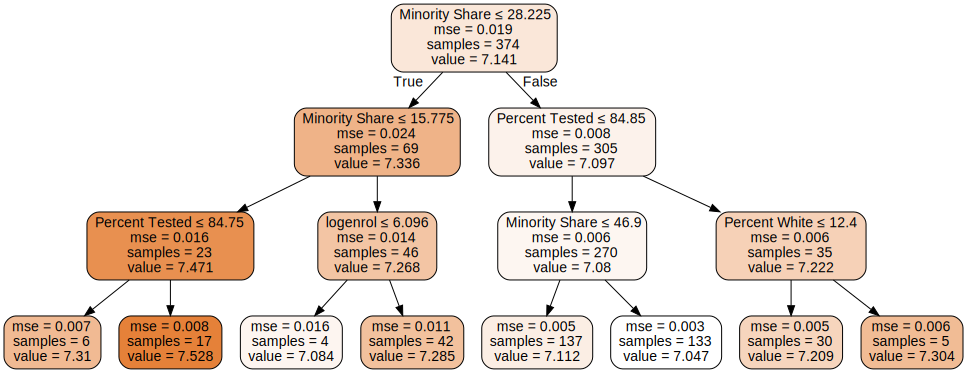

In [192]:
fitted_tree = tree.DecisionTreeRegressor(max_depth = 3).fit(x5, y4)
tree_graph = tree.export_graphviz(fitted_tree, out_file=None,
                                  feature_names=['const', 'Minority Share', 'Percent White', 'Percent Asian',\
                                                 'logenrol', 'Percent Tested', 'logdiff'],
                                  filled=True, rounded=True,
                                  special_characters=True)
display(graphviz.Source(tree_graph))

From the tree above, the most important determinant of SAT score is the `minority share` I constructed above. 

At the first split: if the minority share of the school is no more than 28.225% and 15.775%, the log of Average SAT Score would be 7.336 on average. If the share is in the interval (28.225% and 84.45%], then the log of Average SAT Score would be 7.097 on average. For the rest, they will not go to the second level and the log of their Average SAT Score’s would be 7.141 on average.

At the second split, for those schools with a minority share no more than 15.775%, if they also have no more than 84.75% of student taking the SAT, then the log of their Average SAT Score ‘s would be 7.471 on average. But if they have a log of enrollment less than 6.096, then the log of their Average SAT Score’s would be 7.268 on average. The same idea applies to the other half of the tree.

Since I only allow a maximum of 3 levels, the third split criteria cannot be seen. But from the information displayed, there is already adequate information for the important school characteristics on average SAT score. Precisely, schools with no more than 15.775% of ethnic minorities and no more than 84.75% students taking SAT tend to have higher average SAT scores among all schools. Whereas those with minority shares within (28.225%, 46.9%] and no more than 84.85% students taking SAT tend to have lower average SAT scores among all schools.

The error of prediction is indicated by the MSE. Notice that the MSE decreases in general from the first level to the last level. Overall, the reduction in MSE is between 0.003 and 0.016. But for each split, MSE may go up or down. For example, at the first split, the MSE will increase by 0.005 if school has no more than 28.225% and 15.775% of ethnic minorities. The increase in MSE indicates that the we are less certain about the prediction with the splits, given the sample.

Compared with the OLS output, three pieces of information are obtained:
1. minority share, as well as ASES, is the most important school characteristics compared with the other 5 factors. The significance of minority shares is consistent with the t test results from the OLS output (`Percent Hispanic` and `Percent Black` have significant effect on the SAT outcome). 
2. at each of the following level/split, what characteristic affect the outcome the most can be seen.
3. important cutoff values can be seen with the tree. For instance, the 28.225% for minority shares. This cannot be obtained using OLS. 

Instead of minimizing the MSE for the whole model as OLS, minimizing MSE at each split gives us a better picture at what factors are more correlated with the outcome the most at each stage and what are the thresholds. 

### Conclusion 

Unlike the analysis with maps, regressions show a more general idea of what school characteristic affect the average SAT scores and particularly, how ASES affects the outcome. Combining the results from OLS and regression tree, I can conclude that the racial compositions with the school, especially minority shares, the number of students enrolled and the percentage of student took SAT tests all influence the school-level SAT score significantly. Among all these characteristics, minority shares the most important factor for predicting the average SAT performance of schools. And combining these results with previous findings from maps, it can be concluded that location is the factor that affects the relationship of ASES and SAT outcome. 

# Main Conclusion


The paper aims to find out whether characteristics of schools affect their students’ average SAT scores, which factors play the most important role, and by how much. The main school characteristic I investigated is the average socioeconomic status (ASES). The analysis can be can be seen the as the impact on study outcome by a kind of peer effect. Through the visualizations of the data using tables, boxplots and histograms, I found that the data across boroughs vary a lot and I focused on analyzing the effect by borough in project one, two, and three. In the final project, I adopted the regression methodology to find data-supported evidence. From all the analysis undertook, I found that schools with lower ASES tend to have lower average SAT scores, and vice versa. This is also a sign for the existence of peer effects. The effect of minority shares on the average SAT scores tend to vary from place to place due to different population (in project three) and other possible geographic characteristic such as the surrounding environments, and so on. Beside ASES, the percentage of White and Asian students, the number of students enrolled, and the percentage of student took SAT tests are all significant influencers of the SAT outcome of schools.

However, the result above is based on a dataset with size less than 500, which is very small. Small data size makes the outcome less representative of the population, gives less statistical power to the result (thus less likely to reject the null hypothesis even when there is an effect), and increase the standard error of the estimates. Also, the distribution of data is uneven. For instance, Staten Island only had 10 schools recorded in the dataset whereas the other boroughs had more than 50; most cities only had one school included; major southeastern, some western, eastern, and southern areas of Brough Brooklyn were missing; several areas in Brough Brooklyn (by zip code) only had one or two schools recorded. These single observations in the sample will overrepresent the schools around them that were not contained in the dataset. Thus, the results tend to be biased and worth further investigation with more data.


# Future Work

There are several ways that I want to improve my work. First, I will increase the size of the data I work on by including more public schools in the area in the school year 2014-2015. Small data size makes the outcome less representative of the population, gives less statisticall power to the result (thus less likely to reject the null hypothesis even when there is an effect), and increase the standard error of the estimates. I may consider making it a panel data (the data for these 374 schools over time, such as, from 2014-2015 school years to 2019-2020 school years) if there was a policy that directly affects the ASES of schools in the NYC. 
Second, I will run different kinds of regression to do the estimate. Since I am interested in the causal effect of ASES on schools' average SAT score, not just the correlation, IV regression would be a better choice. The key is to find a strong prior that satify the three requirements. 
Third, I will add fixed effects for each school/zip-code/city/Borough to the regression. Because it is possible that there are differences between unobserved characteristics of each school/zip-code/city/Borough that influence the average SAT performance across them. Fixed effects control for the time-invariant factors and makes the estimate less confounded.